# Clustering Results Analysis

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
#import plotly.express as px


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

#Import classes
from graph_script import run_plots


import plotly.express as px
import pingouin


In [51]:
data = pd.read_csv('./data/final_clustered_extra_cols.csv',index_col=0)

In [52]:
df = data

In [53]:
df.head()

,ID,KM3,GM3,MntTotal,MntSpentNorm,Income,Len_Customer,HasChildren,HasPartner,NumChildren,age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTot,Response,Complain,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumTotalPurchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response.1,Complain.1,KM2,AC3,AC2,GM2,LogIncome,MntWinesNorm,MntFruitsNorm,MntMeatProductsNorm,MntFishProductsNorm,MntSweetProductsNorm,MntGoldProdsNorm,NumDealsPurchasesNorm,NumWebPurchasesNorm,NumStorePurchasesNorm,NumWebVisitsMonthNorm,NumCatalogPurchasesNorm,SpendPropOfTotal,AvgPerPurchase,NumTotalPurchasesNorm
0,1826,2,2,1190,10.818182,84835.0,110.0,0,0,0,44,0,0,0,0,0,0,1,0,1970,Bachelor,Divorced,0,0,2014-06-16,0,189,104,379,111,189,218,16,1,4,4,6,1,1,0,0,1,0,0,11.348475,1.718182,0.945455,3.445455,1.009091,1.718182,1.981818,0.009091,0.036364,0.054545,0.009091,0.036364,0.101506,74.375000,0.145455
1,1,2,0,577,5.198198,57091.0,111.0,0,0,0,53,0,1,0,0,0,1,1,0,1961,Bachelor,Single,0,0,2014-06-15,0,464,5,64,7,0,37,23,1,7,3,7,5,1,0,0,2,0,0,10.952419,4.180180,0.045045,0.576577,0.063063,0.000000,0.333333,0.009009,0.063063,0.063063,0.045045,0.027027,0.072477,25.086957,0.207207
2,10476,2,0,251,1.743056,67267.0,144.0,1,1,1,56,0,0,0,0,0,0,0,0,1958,Bachelor,Married,0,1,2014-05-13,0,134,11,59,15,2,30,13,1,3,2,5,2,0,0,0,2,0,0,11.116440,0.930556,0.076389,0.409722,0.104167,0.013889,0.208333,0.006944,0.020833,0.034722,0.013889,0.013889,0.020626,19.307692,0.090278
3,1386,1,1,11,0.075342,32474.0,146.0,1,1,2,47,0,0,0,0,0,0,0,0,1967,Bachelor,Together,1,1,2014-05-11,0,10,0,1,0,0,0,11,1,1,0,2,7,0,0,1,0,1,1,10.388226,0.068493,0.000000,0.006849,0.000000,0.000000,0.000000,0.006849,0.006849,0.013699,0.047945,0.000000,0.001847,1.000000,0.075342
4,5371,1,1,91,0.508380,21474.0,179.0,1,0,1,25,0,0,1,0,0,1,1,0,1989,Bachelor,Single,1,0,2014-04-08,0,6,16,24,11,0,34,15,2,3,1,2,7,1,0,1,0,1,1,9.974645,0.033520,0.089385,0.134078,0.061453,0.000000,0.189944,0.011173,0.016760,0.011173,0.039106,0.005587,0.018845,6.066667,0.083799


## Statistical tests

In [ ]:
pingouin.pairwise_tests(data=df,dv='Income',between='GM3',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,GM3,0,1,False,True,43.308382,1774.361226,two-sided,3.266217e-280,9.798650e-280,bonf,7.014e+275,2.029973
1,GM3,0,2,False,True,-33.564574,1207.020324,two-sided,5.327622e-175,1.598286e-174,bonf,7.488e+177,-1.690789
2,GM3,1,2,False,True,-77.944498,1067.956403,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-4.353468


In [ ]:
pingouin.pairwise_tests(data=df,dv='MntTotal',between='GM3',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,GM3,0,1,False,True,44.301919,980.766881,two-sided,2.754003e-236,8.262010e-236,bonf,8.237e+284,1.943188
1,GM3,0,2,False,True,-30.351509,925.036358,two-sided,5.660075e-141,1.698022e-140,bonf,1.166e+152,-1.698263
2,GM3,1,2,False,True,-69.365166,455.839019,two-sided,2.307402e-244,6.922207e-244,bonf,inf,-5.428477


In [ ]:
group0,group1,group2=df[df['GM3']==0],df[df['GM3']==1],df[df['GM3']==2]
#pingouin.ttest(x=df[''])

In [ ]:
pingouin.ttest(x=group0['MntTotal'],y=group2['MntTotal'],paired=False, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-30.351509,925.036358,less,2.830037e-141,"[-inf, -688.97]",1.699166,2.332e+152,1.0


In [77]:
pingouin.ttest(x=group0['Income'],y=group2['Income'],paired=False, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-33.564574,1207.020324,less,2.663811e-175,"[-inf, -19481.42]",1.691688,1.498e+178,1.0


In [ ]:
pingouin.ttest(x=group1['MntTotal'],y=group0['MntTotal'],paired=False, alternative='less') #first group less than 2nd

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-44.301919,980.766881,less,1.377002e-236,"[-inf, -602.07]",1.944009,1.647e+285,1.0


In [ ]:
# pingouin.pairwise_tests(data=df,dv='MntTotal',between='GM3',padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,GM3,0,1,False,True,44.301919,980.766881,two-sided,2.754003e-236,8.262010e-236,bonf,8.237e+284,1.943188
1,GM3,0,2,False,True,-30.351509,925.036358,two-sided,5.660075e-141,1.698022e-140,bonf,1.166e+152,-1.698263
2,GM3,1,2,False,True,-69.365166,455.839019,two-sided,2.307402e-244,6.922207e-244,bonf,inf,-5.428477


## Aggregate Analyses

Text(0.5, 1.0, 'Cluster Sizes for Gaussian Mixture Clusters')

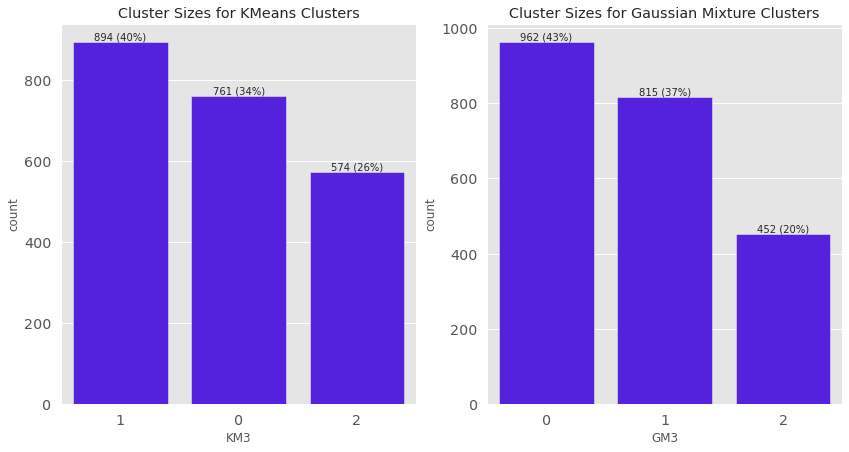

In [75]:
# Code hint from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(14, 7))

ax = sns.countplot(x=df['KM3'], data=df,hue=None,color='#4503fc',order=df['KM3'].value_counts(ascending=False).index, ax=ax0);
        
abs_values = df['KM3'].value_counts(ascending=False)
rel_values = df['KM3'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title("Cluster Sizes for KMeans Clusters")


ax = sns.countplot(x=df['GM3'], data=df,hue=None,color='#4503fc',order=df['GM3'].value_counts(ascending=False).index, ax=ax1);
        
abs_values = df['GM3'].value_counts(ascending=False)
rel_values = df['GM3'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title("Cluster Sizes for Gaussian Mixture Clusters")


#plt.savefig('./figures/clusters_sizes.png')

Text(0.5, 1.0, 'Total Amount Spent by Cluster (Normalized)')

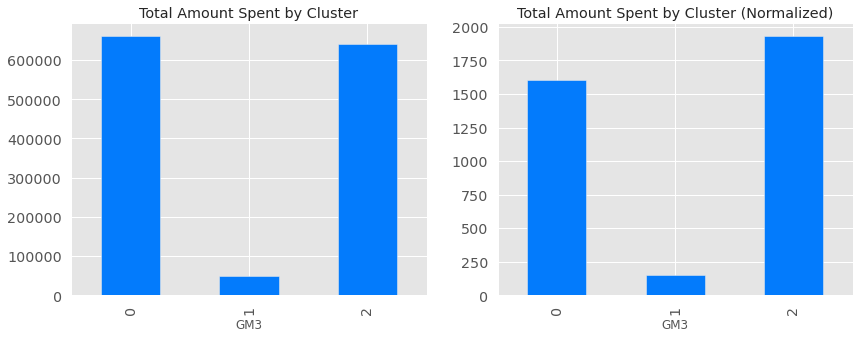

In [66]:
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
#plt.style.use('ggplot')
df.groupby('GM3')['MntTotal'].sum().plot(kind='bar',ax=ax0,color='#037bfc')
df.groupby('GM3')['MntSpentNorm'].sum().plot(kind='bar',ax=ax1,color='#037bfc')
ax0.set_title("Total Amount Spent by Cluster")
ax1.set_title("Total Amount Spent by Cluster (Normalized)")

Text(0.5, 1.0, 'Total Amount Spent by Cluster (Normalized)')

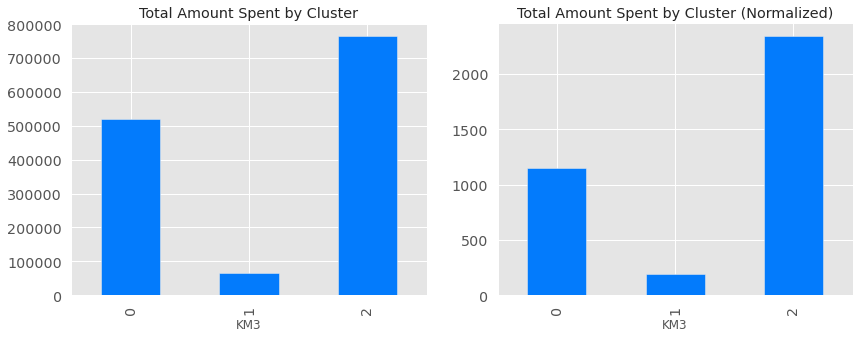

In [67]:
fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(14,5))
#plt.style.use('ggplot')
df.groupby('KM3')['MntTotal'].sum().plot(kind='bar',ax=ax0,color='#037bfc')
df.groupby('KM3')['MntSpentNorm'].sum().plot(kind='bar',ax=ax1,color='#037bfc')
ax0.set_title("Total Amount Spent by Cluster")
ax1.set_title("Total Amount Spent by Cluster (Normalized)")

## Plots

--------------------Producing plots for KM3--------------------
CLUSTERING RESULTS OVER AMOUNT SPENT AND LENGTH AS CUSTOMER
Income vs Total Amount Plot


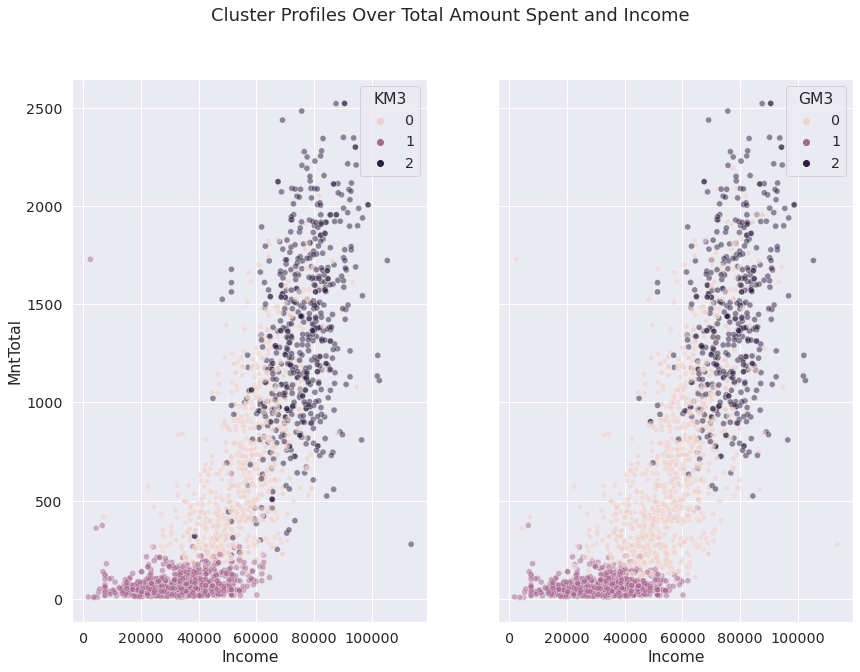

<Figure size 648x504 with 0 Axes>

Income vs Total Normalized Amount Plot


<Figure size 432x288 with 0 Axes>

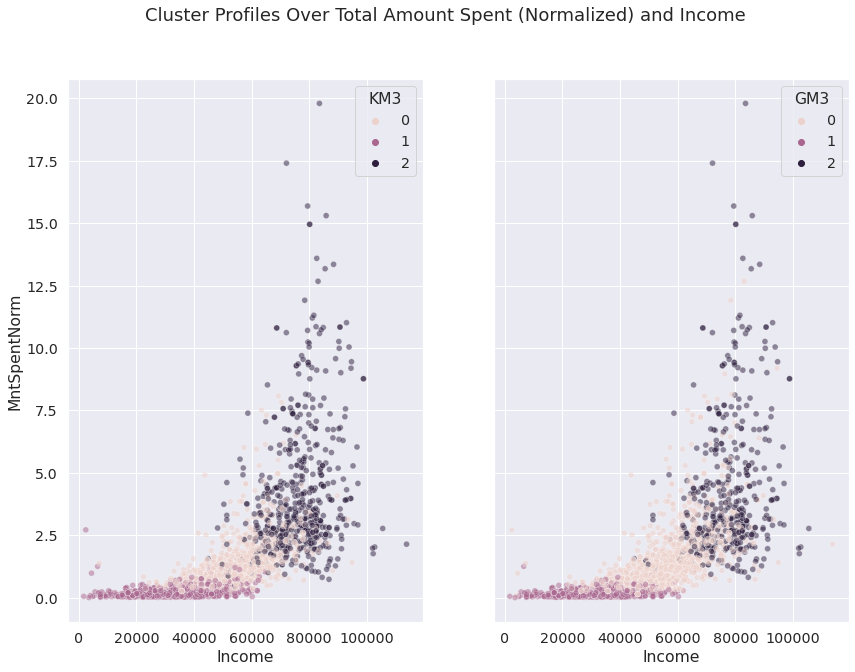

<Figure size 648x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

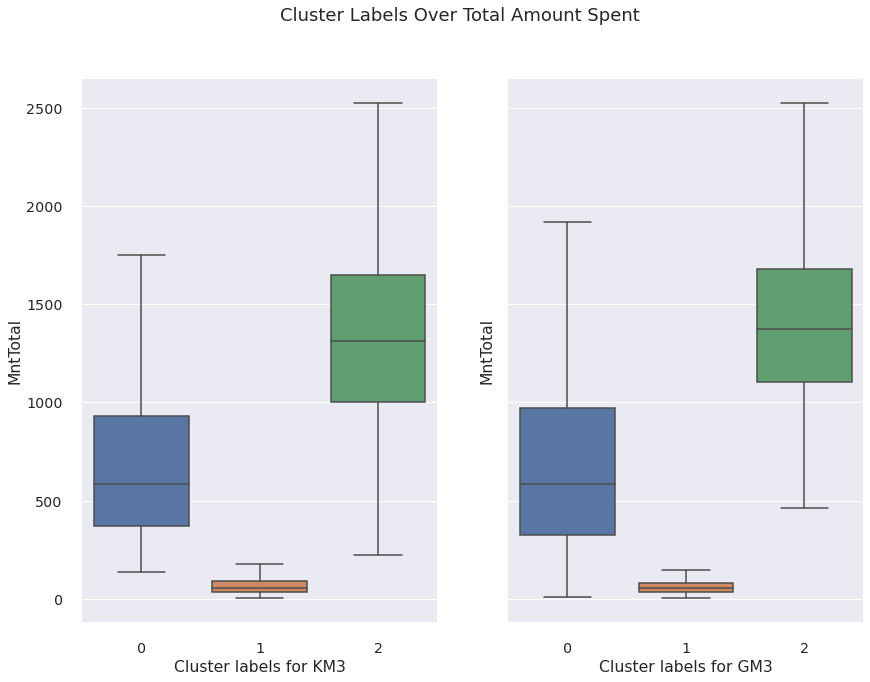

<Figure size 432x288 with 0 Axes>

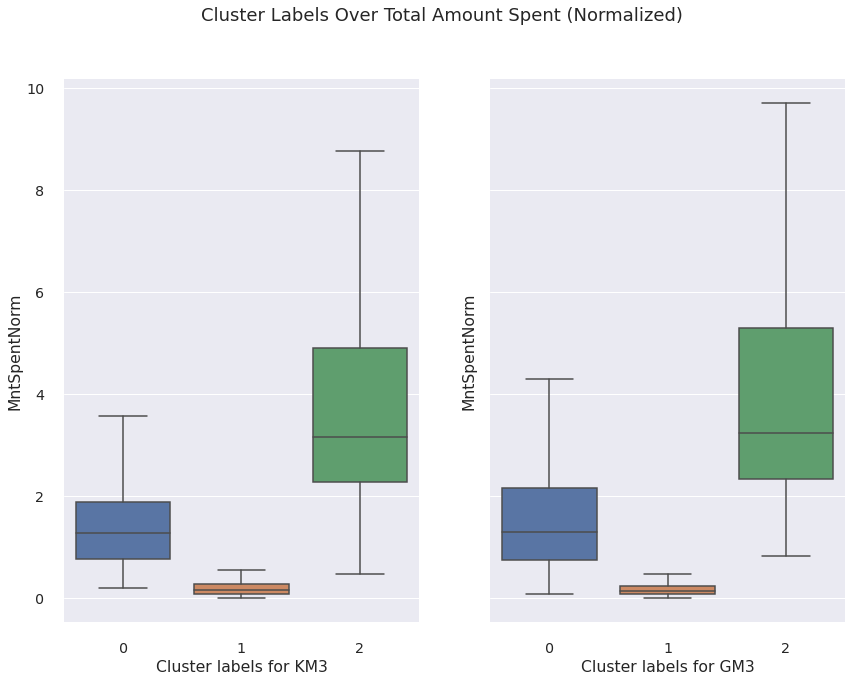

<Figure size 432x288 with 0 Axes>

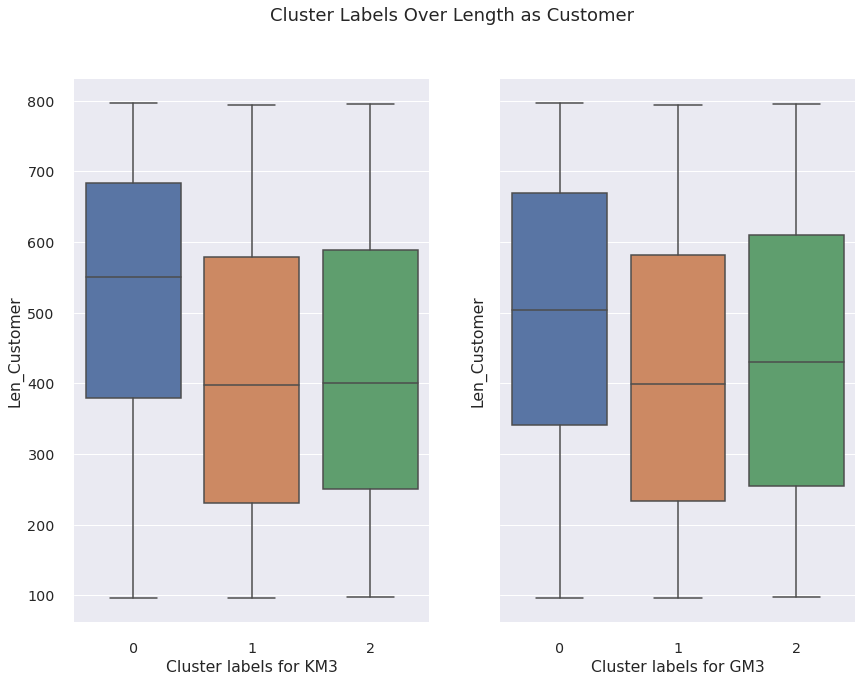

<Figure size 432x288 with 0 Axes>

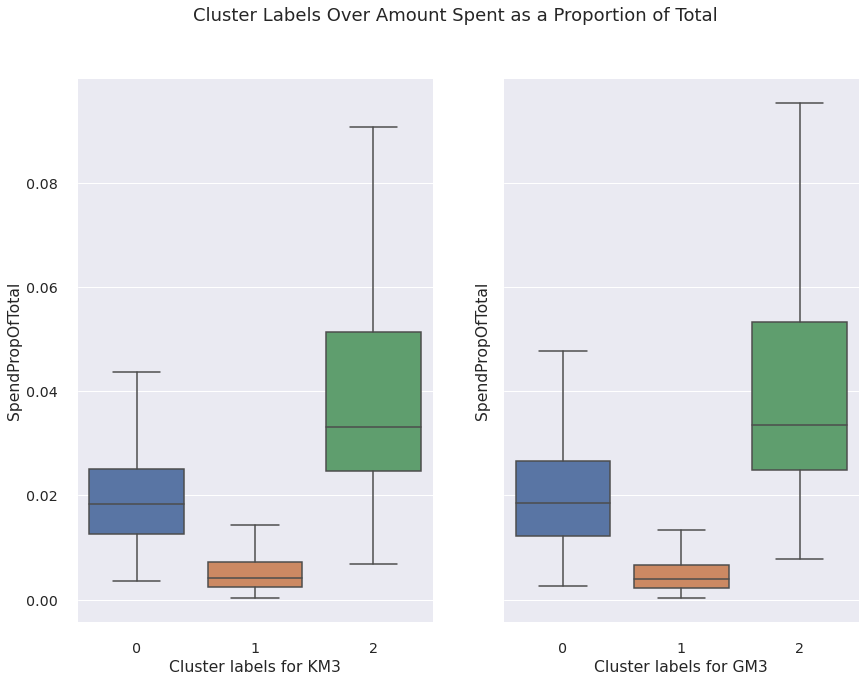

<Figure size 432x288 with 0 Axes>

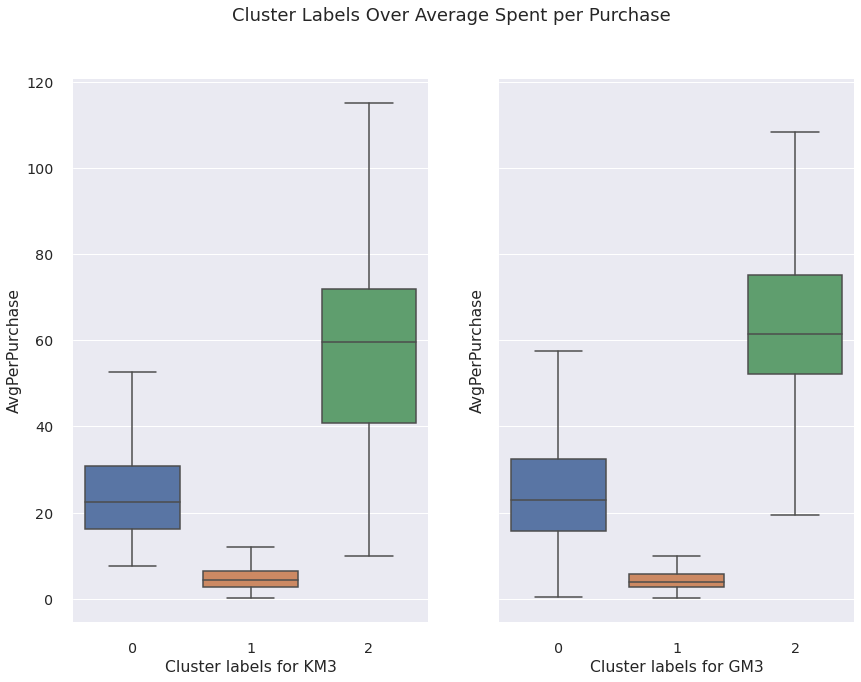

<Figure size 432x288 with 0 Axes>

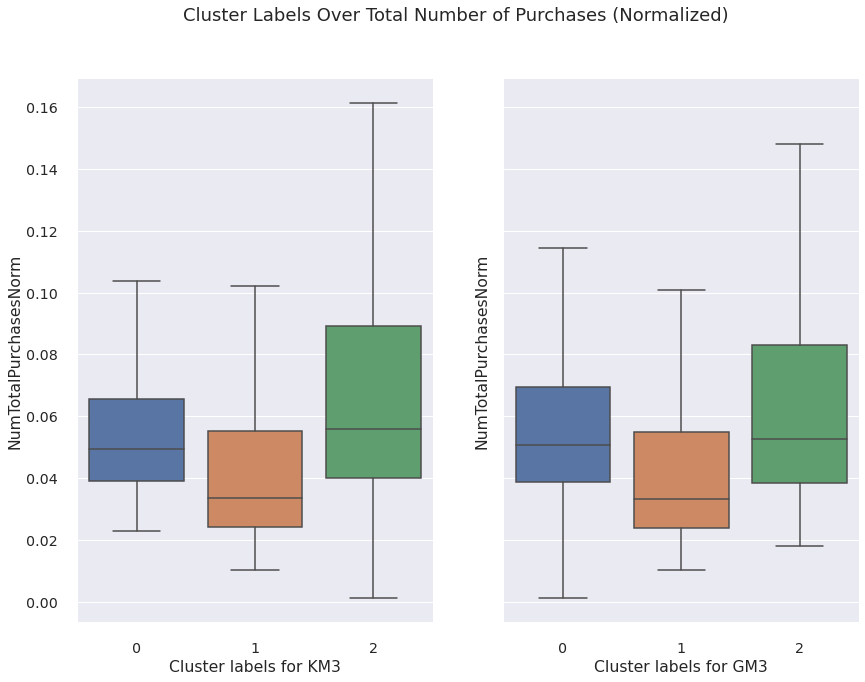

CLUSTERINS OVER DEMOGRAPHIC VARIABLES


<Figure size 432x288 with 0 Axes>

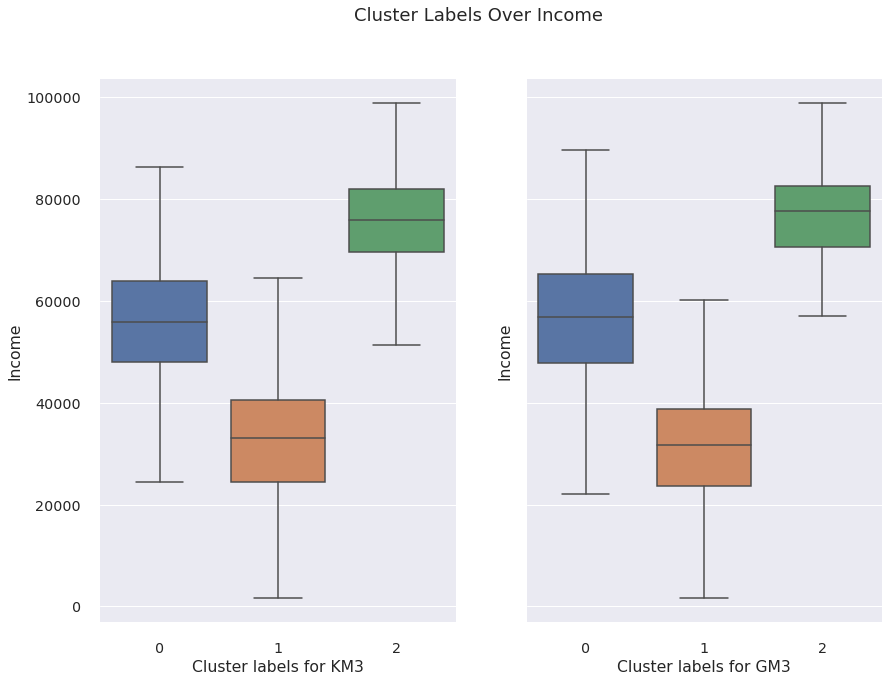

<Figure size 432x288 with 0 Axes>

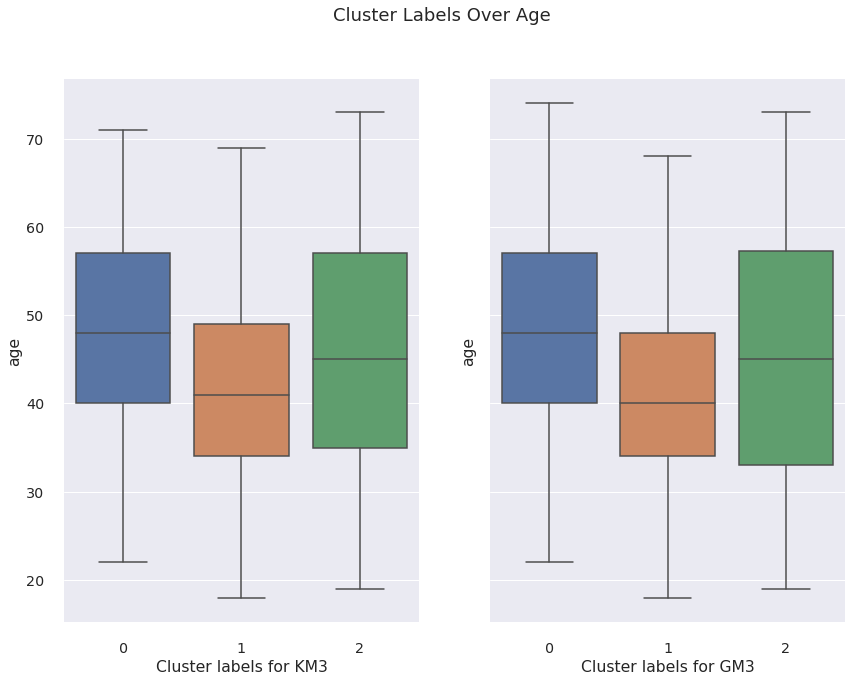

EXAMINE DEALS AND CAMPAIGNS


<Figure size 432x288 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


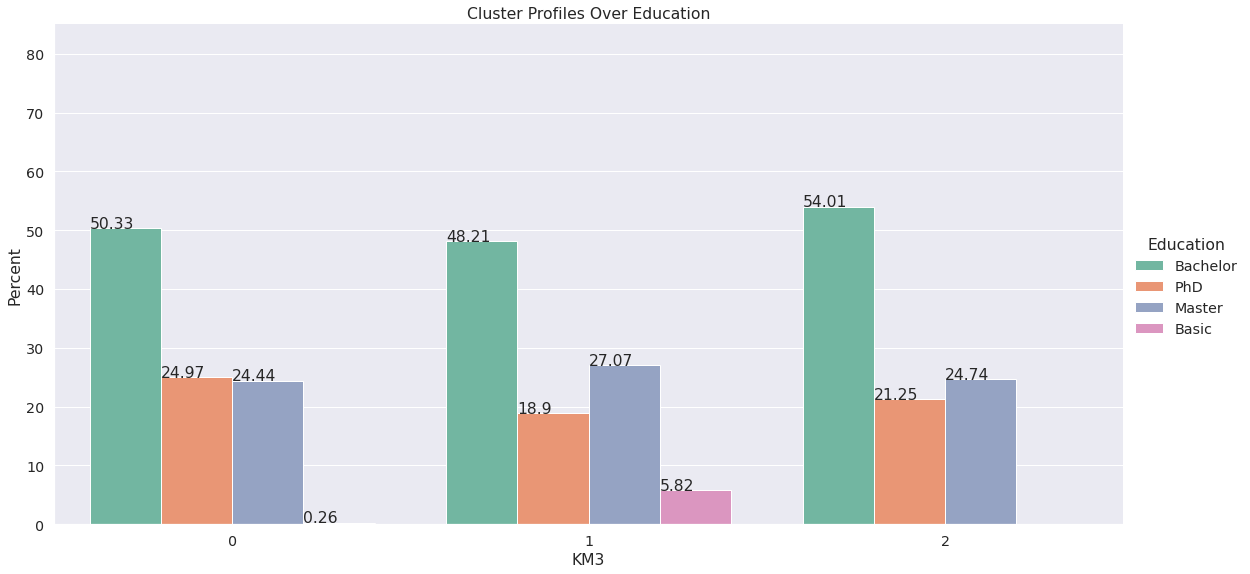

posx and posy should be finite values
posx and posy should be finite values


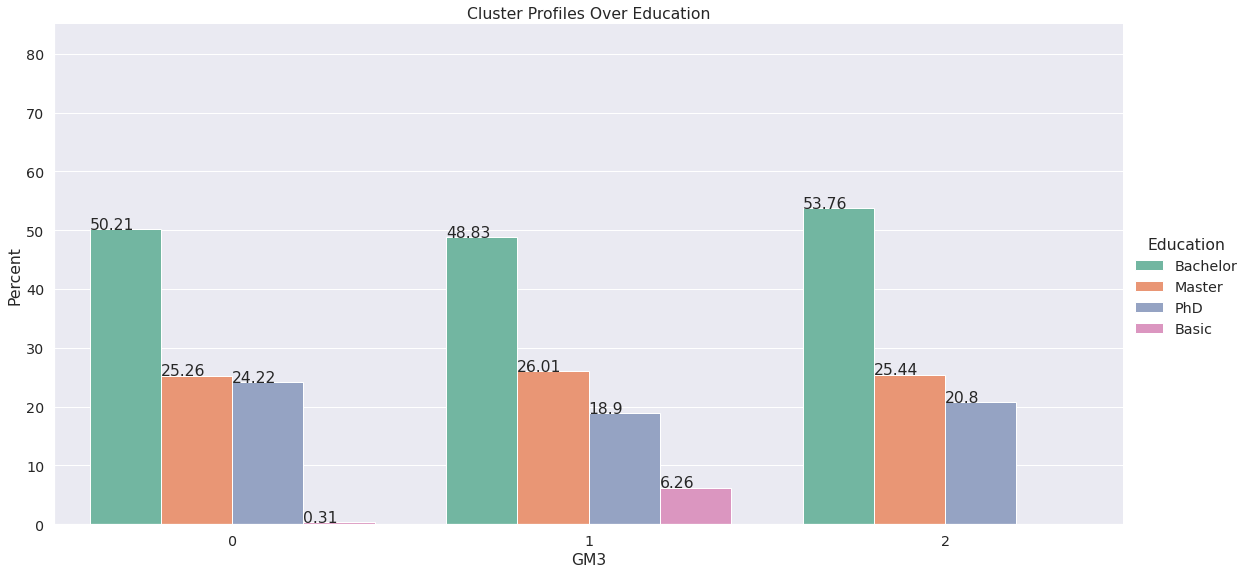

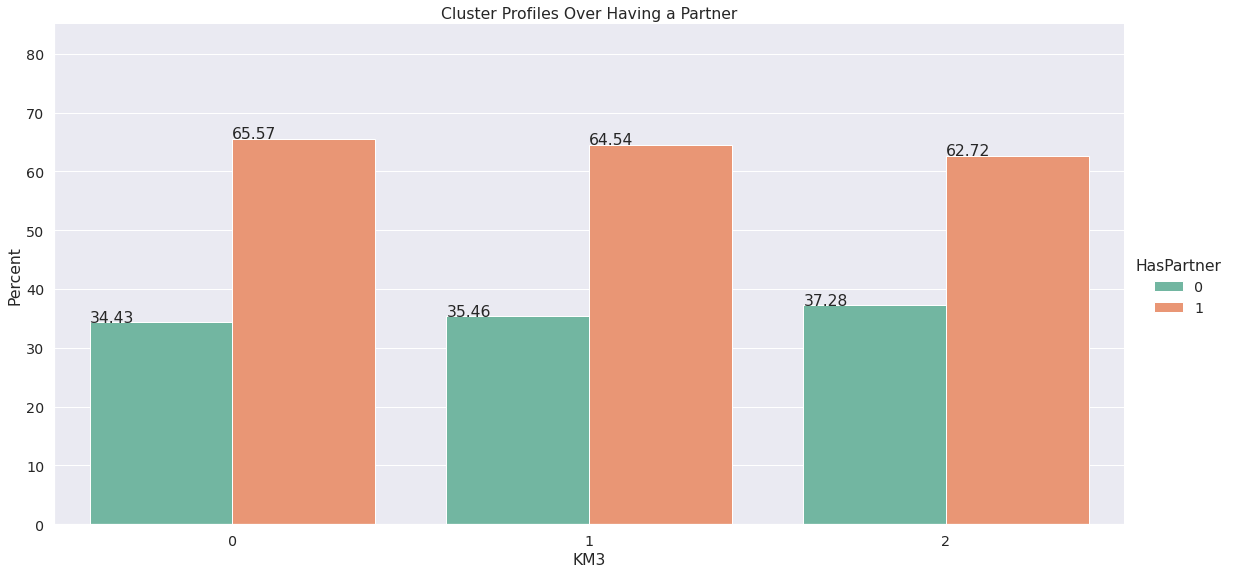

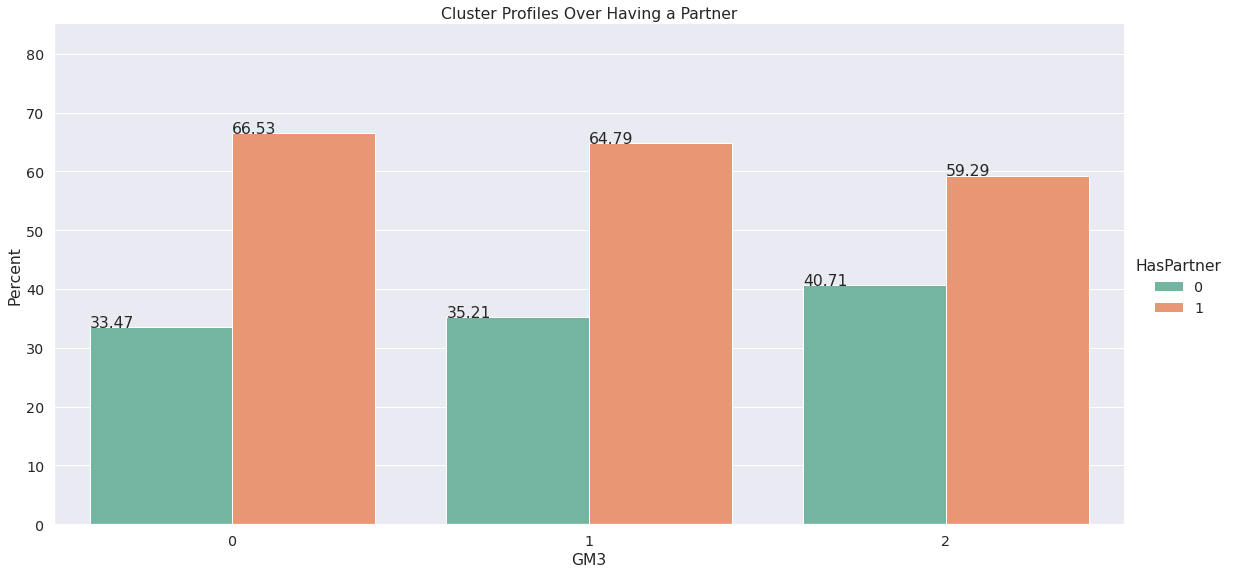

posx and posy should be finite values
posx and posy should be finite values


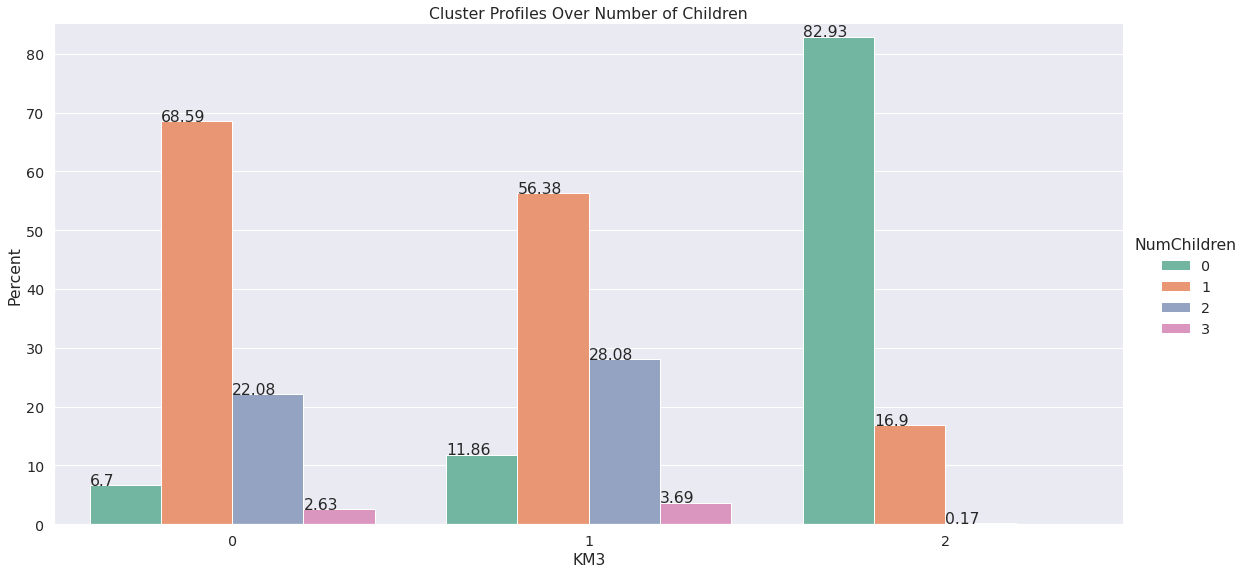

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


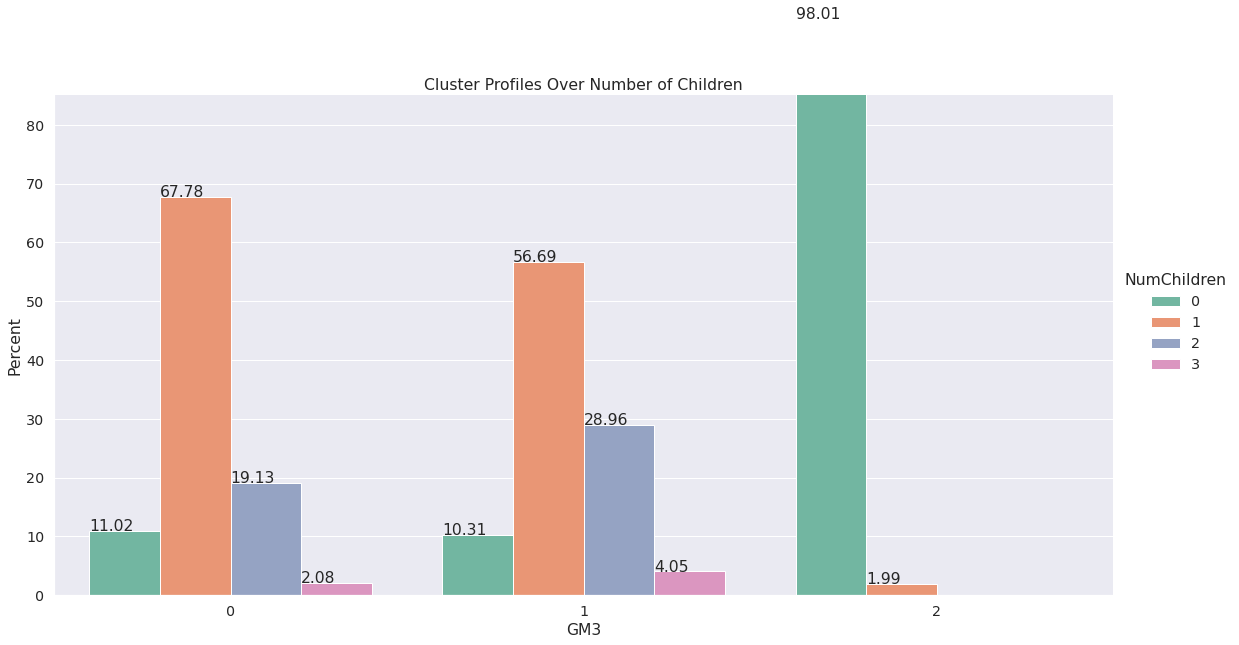

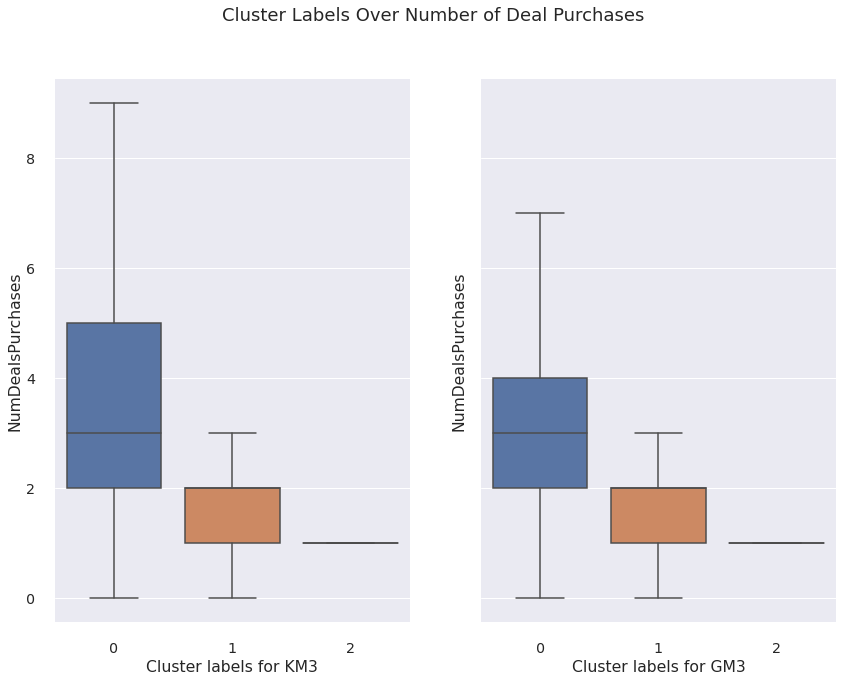

<Figure size 432x288 with 0 Axes>

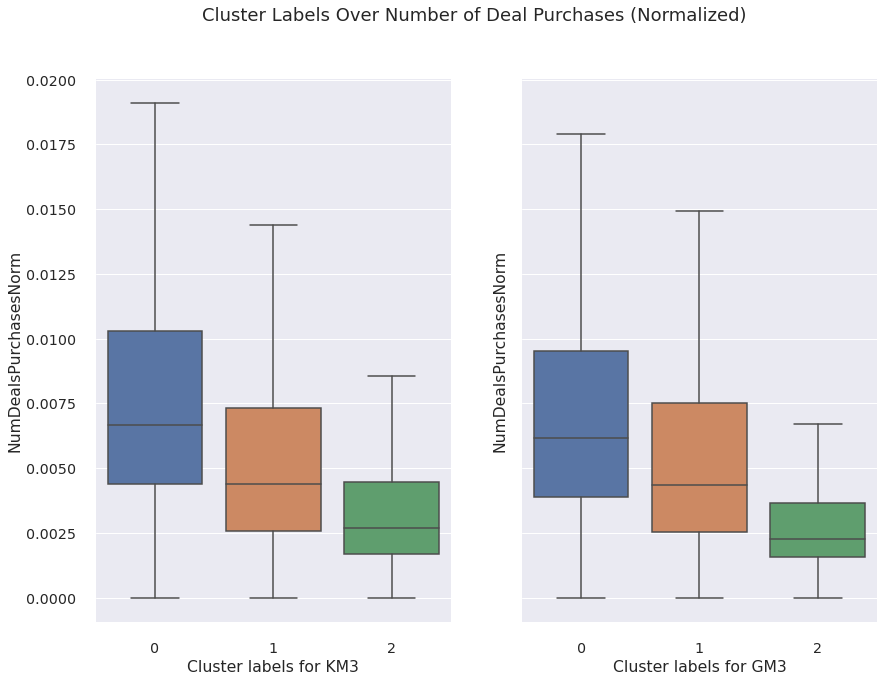

CLUSTERS OVER CAMPAIGNS
0    2085
1     144
Name: AcceptedCmp1, dtype: int64


<Figure size 432x288 with 0 Axes>

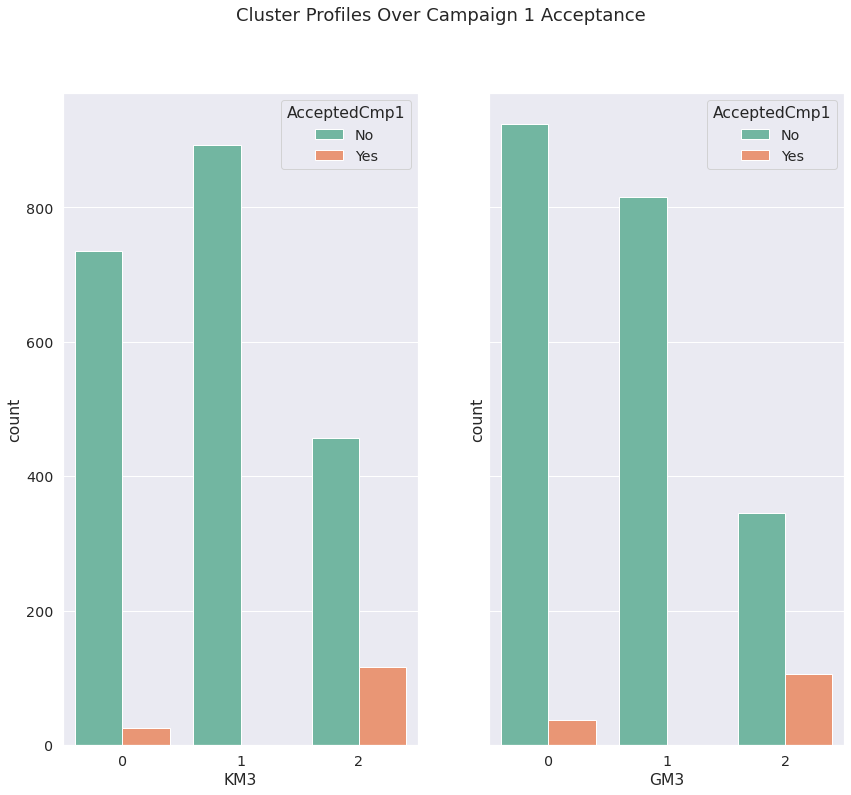

<Figure size 648x504 with 0 Axes>

0    2199
1      30
Name: AcceptedCmp2, dtype: int64


<Figure size 432x288 with 0 Axes>

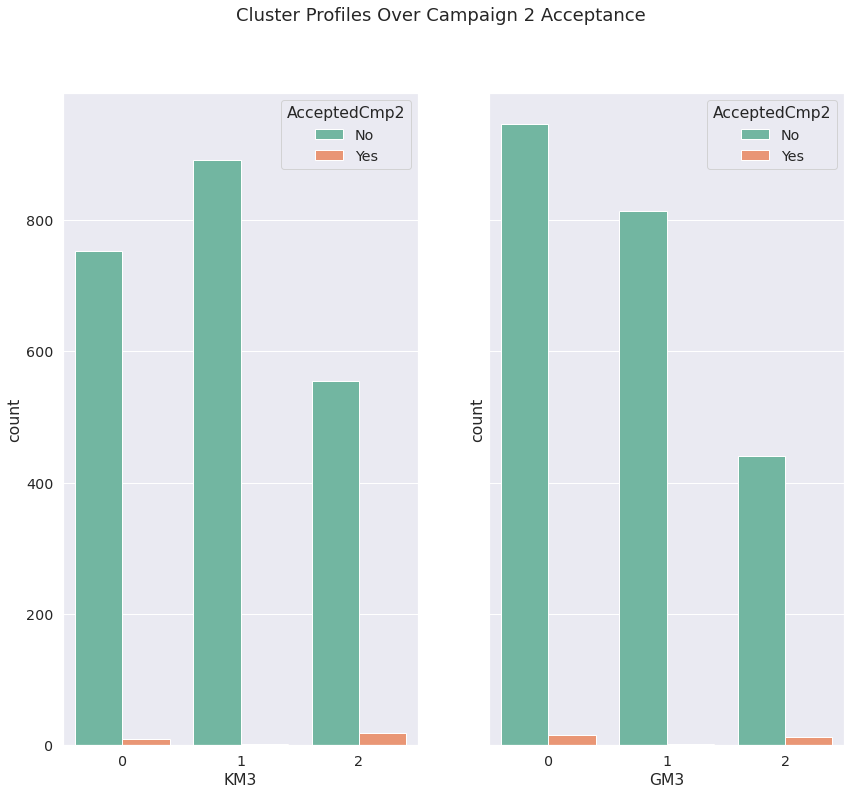

<Figure size 648x504 with 0 Axes>

0    2066
1     163
Name: AcceptedCmp3, dtype: int64


<Figure size 432x288 with 0 Axes>

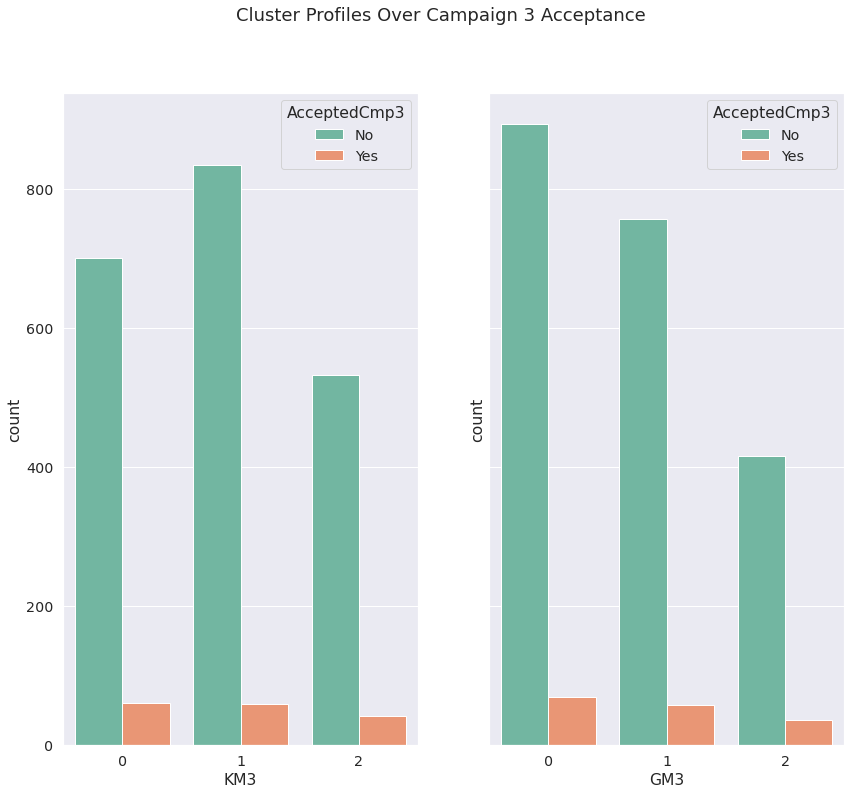

<Figure size 648x504 with 0 Axes>

0    2062
1     167
Name: AcceptedCmp4, dtype: int64


<Figure size 432x288 with 0 Axes>

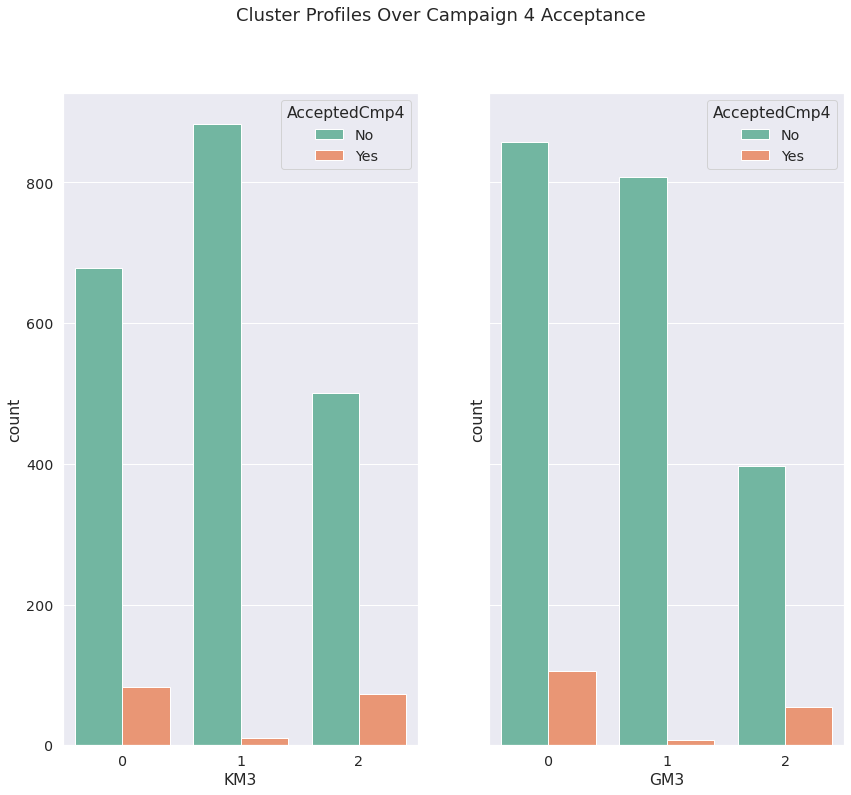

<Figure size 648x504 with 0 Axes>

0    2067
1     162
Name: AcceptedCmp5, dtype: int64


<Figure size 432x288 with 0 Axes>

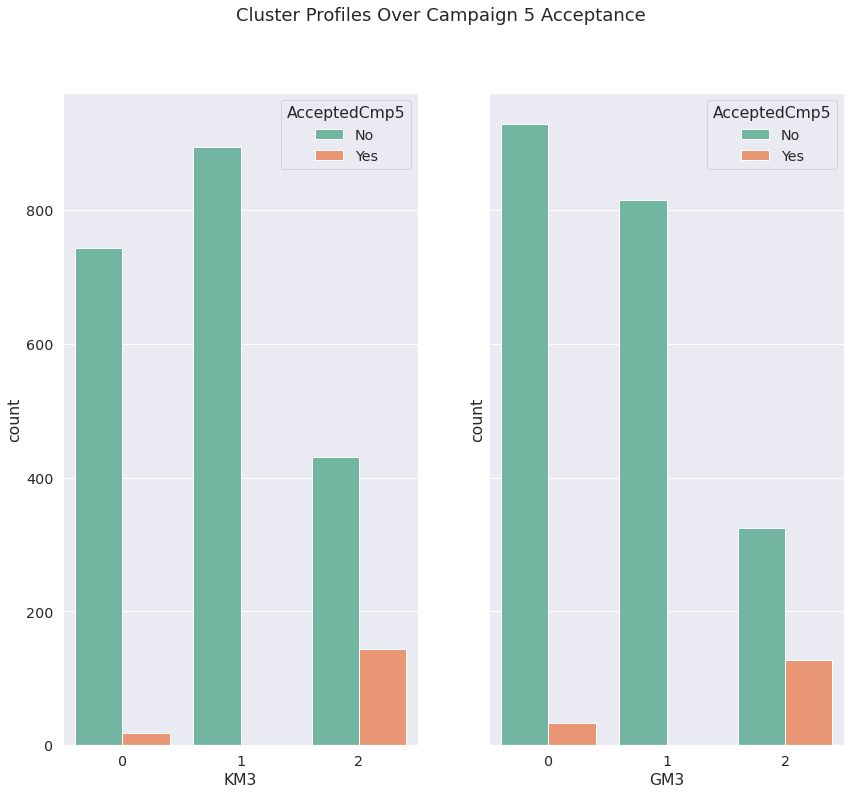

<Figure size 648x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

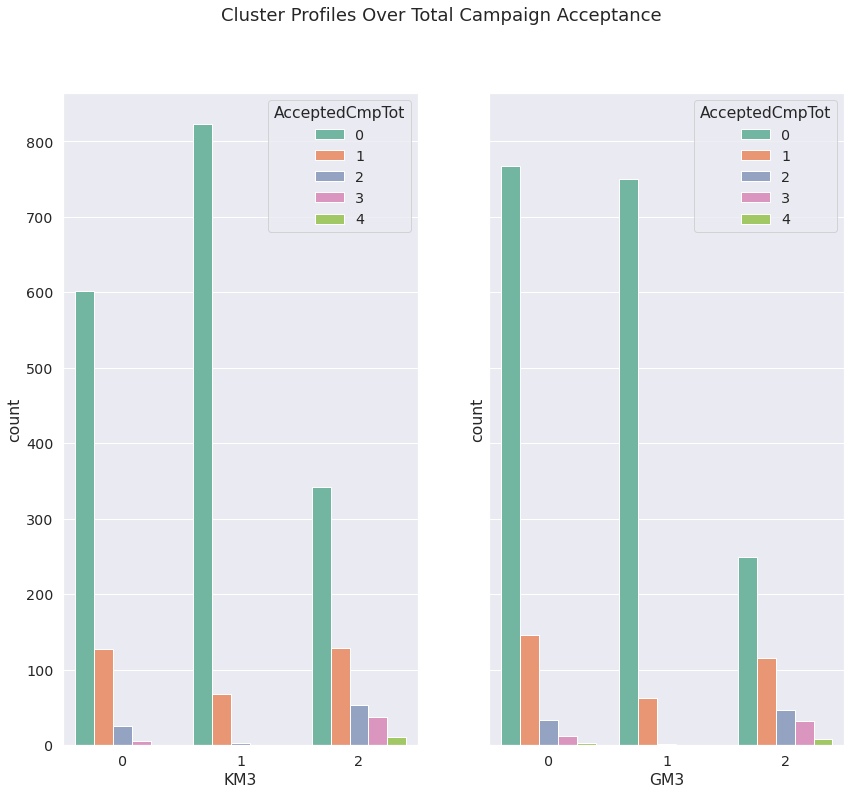

<Figure size 648x504 with 0 Axes>

CLUSTERS OVER PURCHASE MEDIUM


<Figure size 432x288 with 0 Axes>

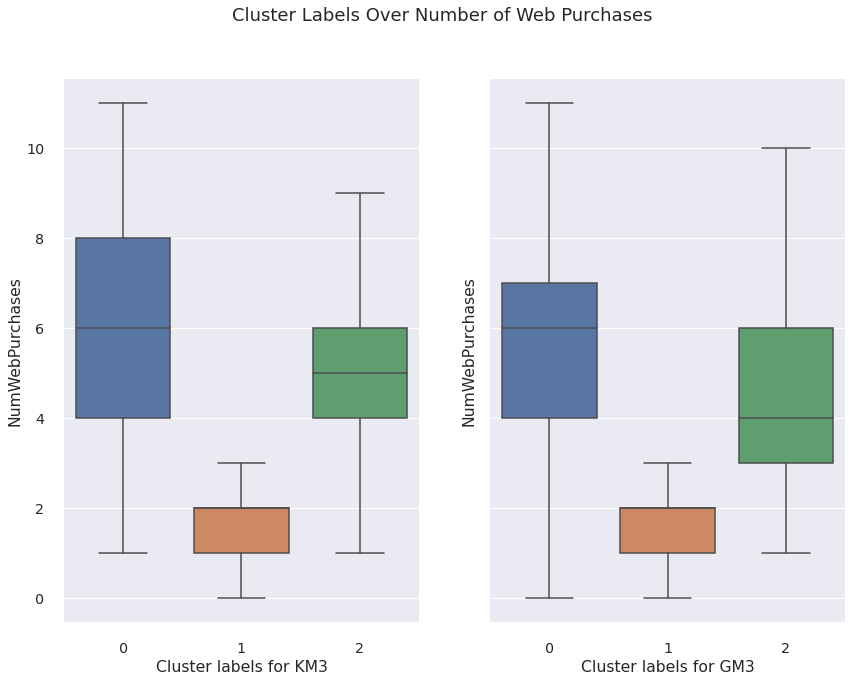

<Figure size 432x288 with 0 Axes>

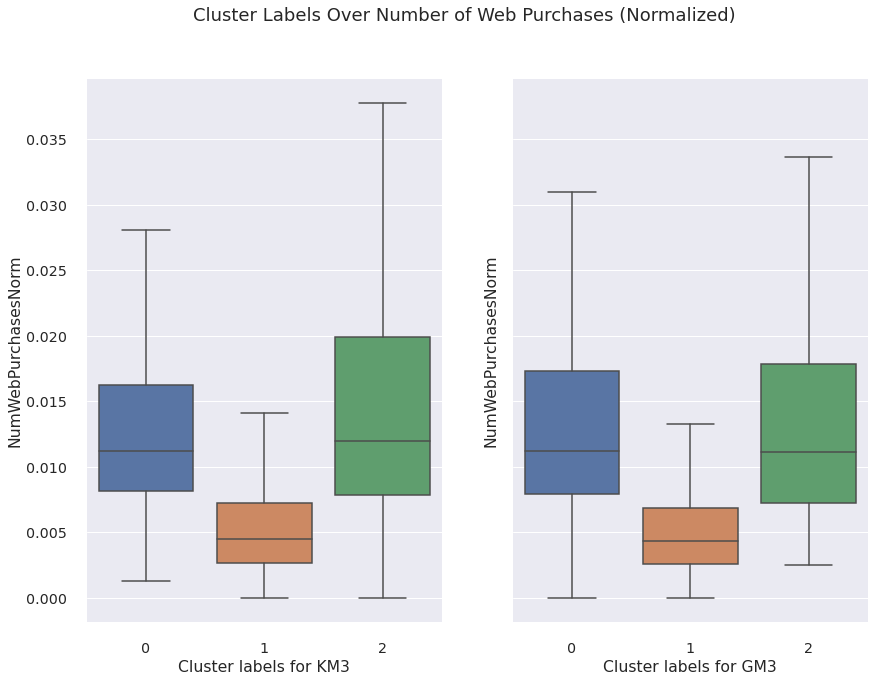

<Figure size 432x288 with 0 Axes>

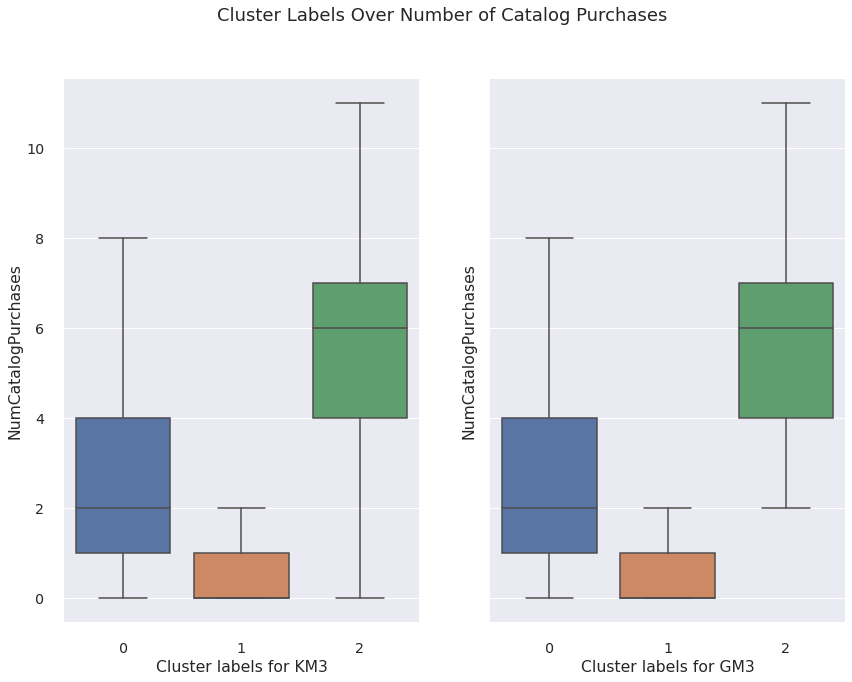

<Figure size 432x288 with 0 Axes>

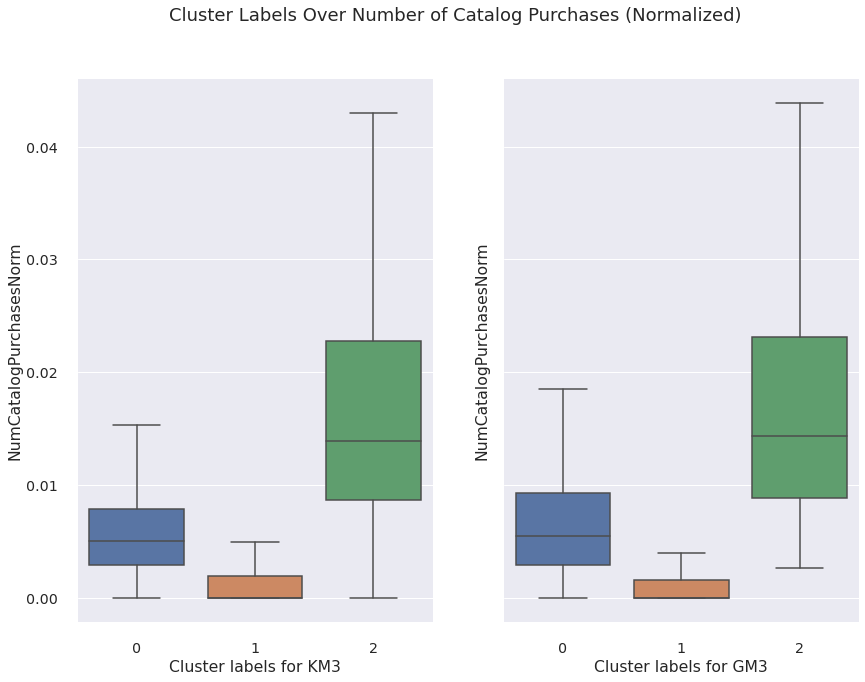

<Figure size 432x288 with 0 Axes>

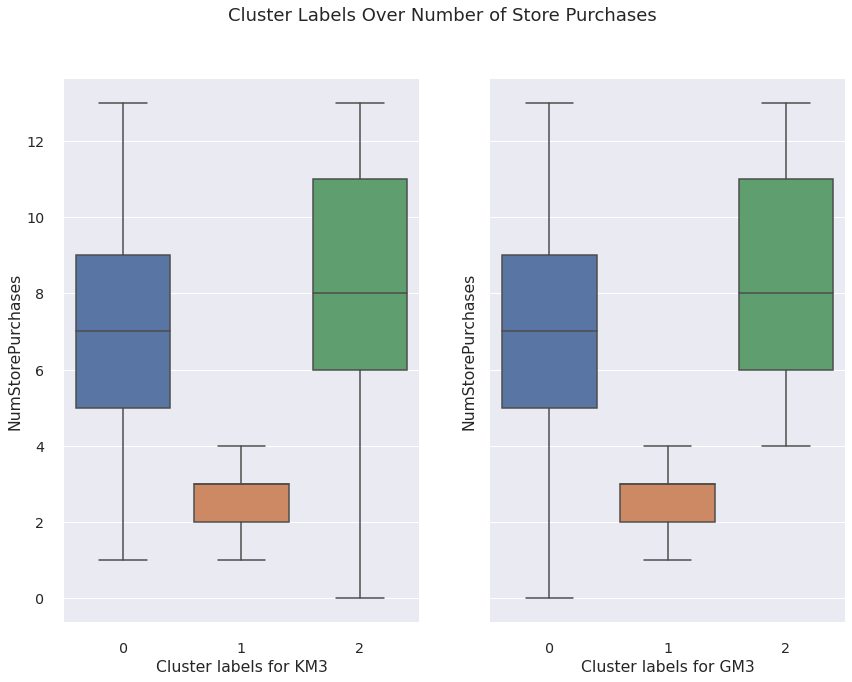

<Figure size 432x288 with 0 Axes>

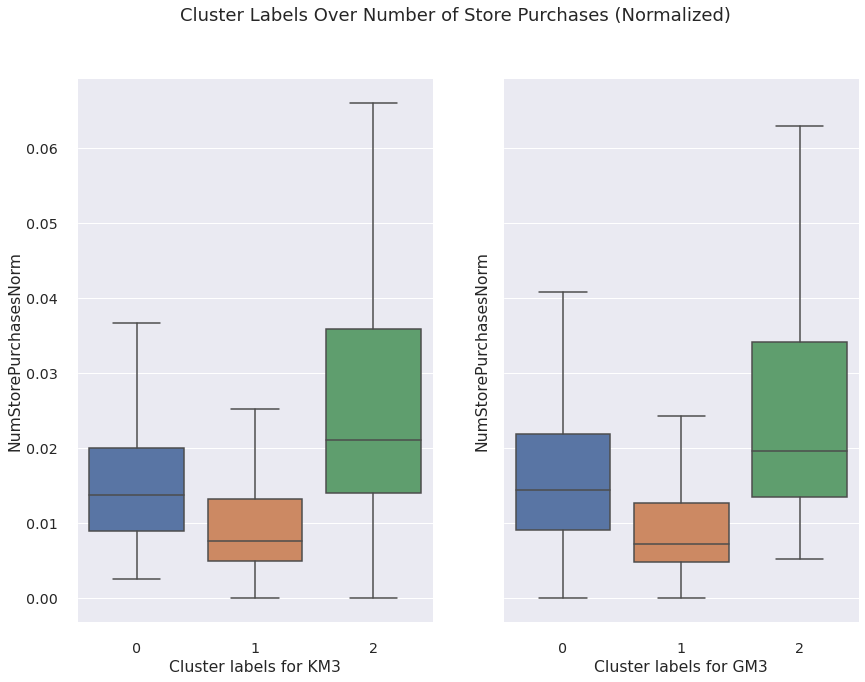

<Figure size 432x288 with 0 Axes>

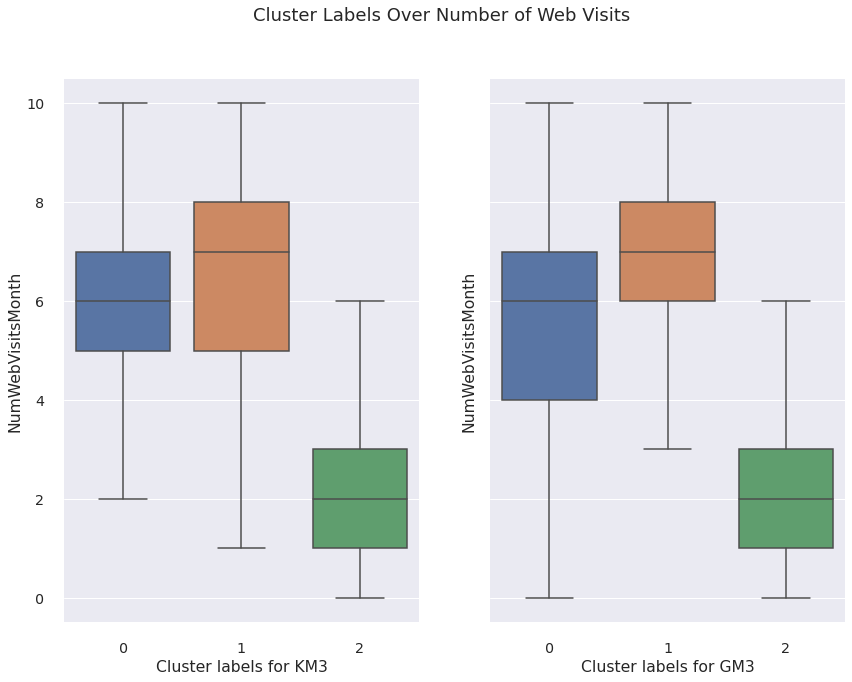

<Figure size 432x288 with 0 Axes>

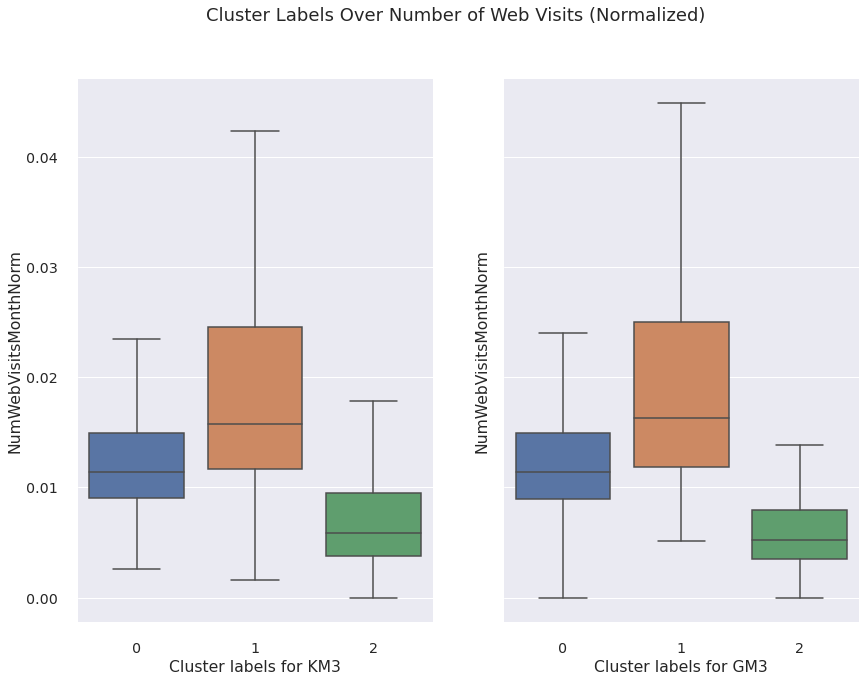

<Figure size 432x288 with 0 Axes>

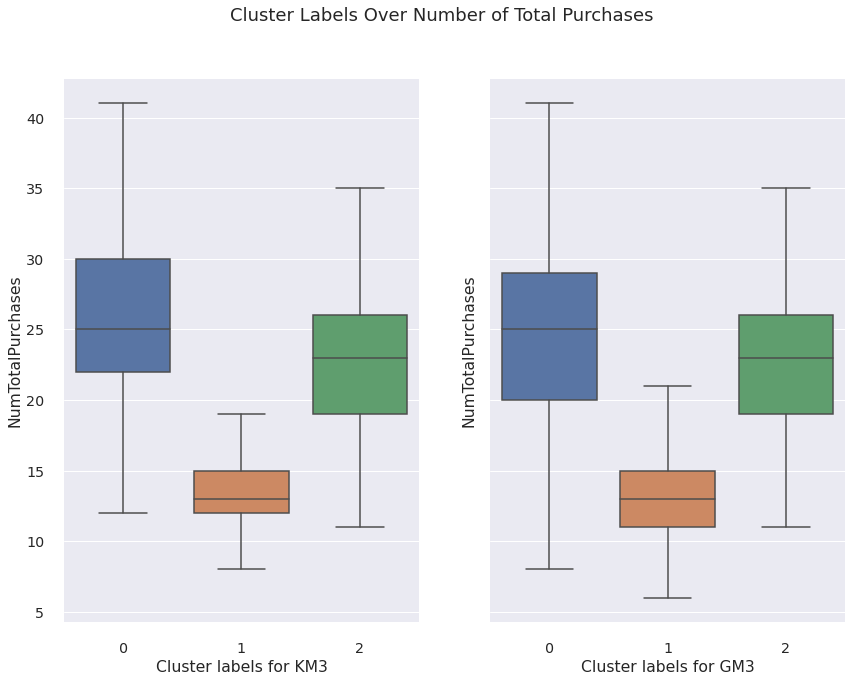

<Figure size 432x288 with 0 Axes>

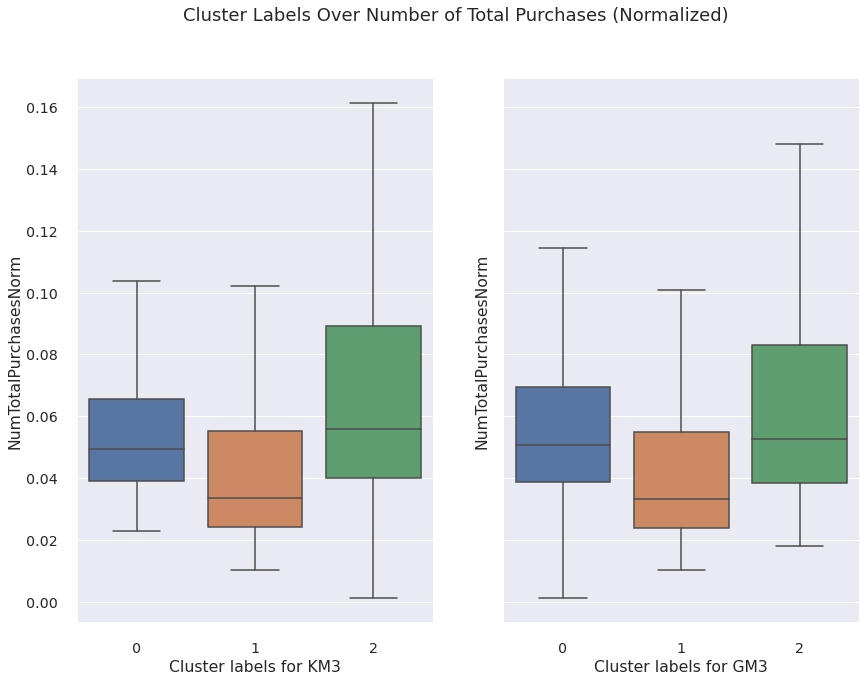

CLUSTERS OVER PRODUCT TYPE


<Figure size 432x288 with 0 Axes>

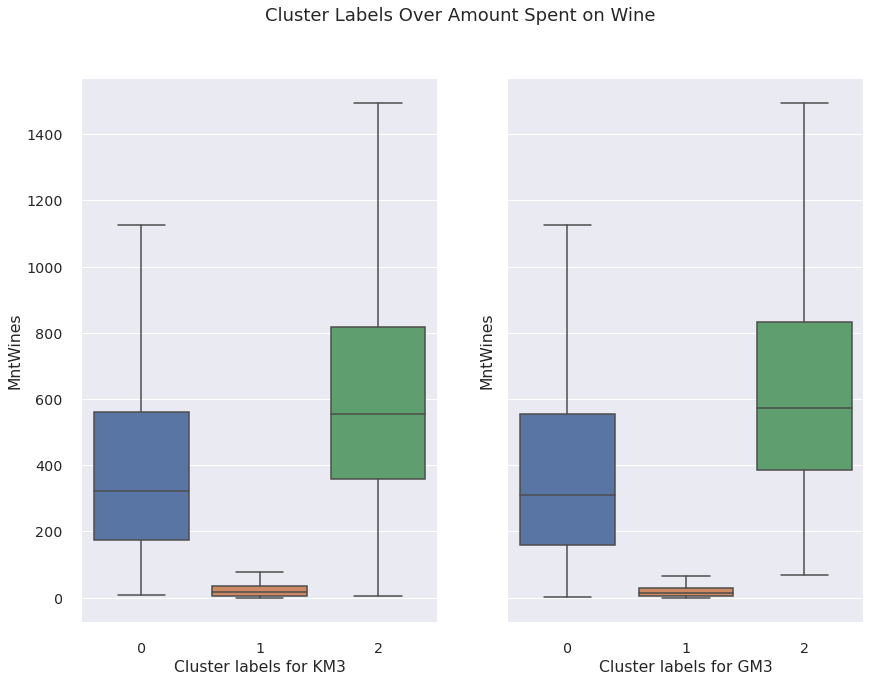

<Figure size 432x288 with 0 Axes>

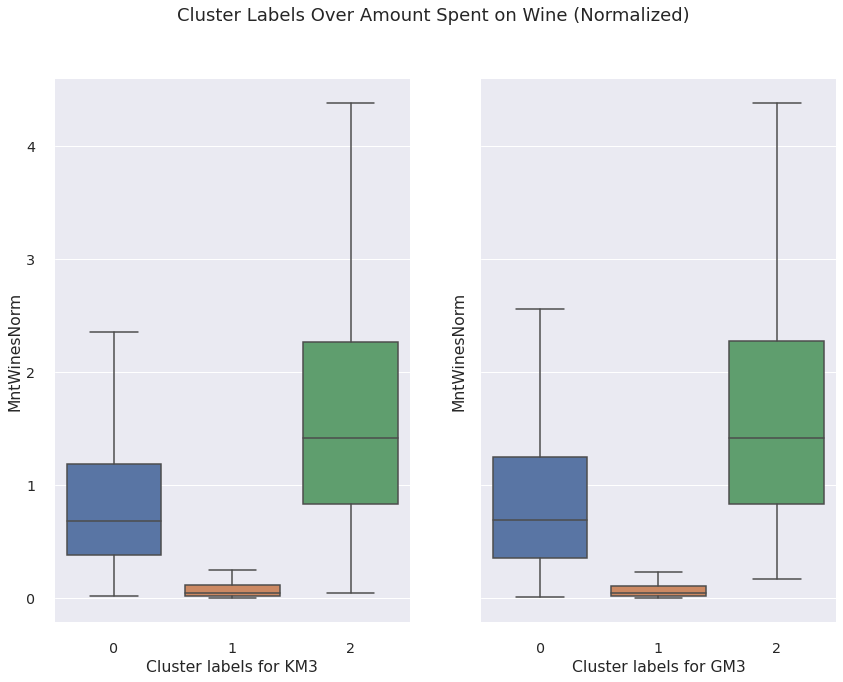

<Figure size 432x288 with 0 Axes>

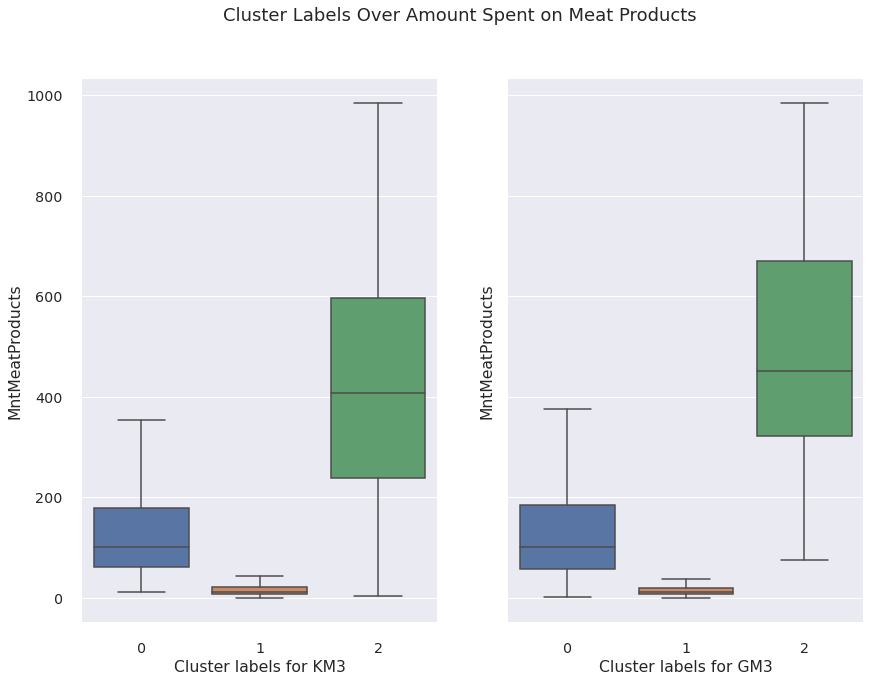

<Figure size 432x288 with 0 Axes>

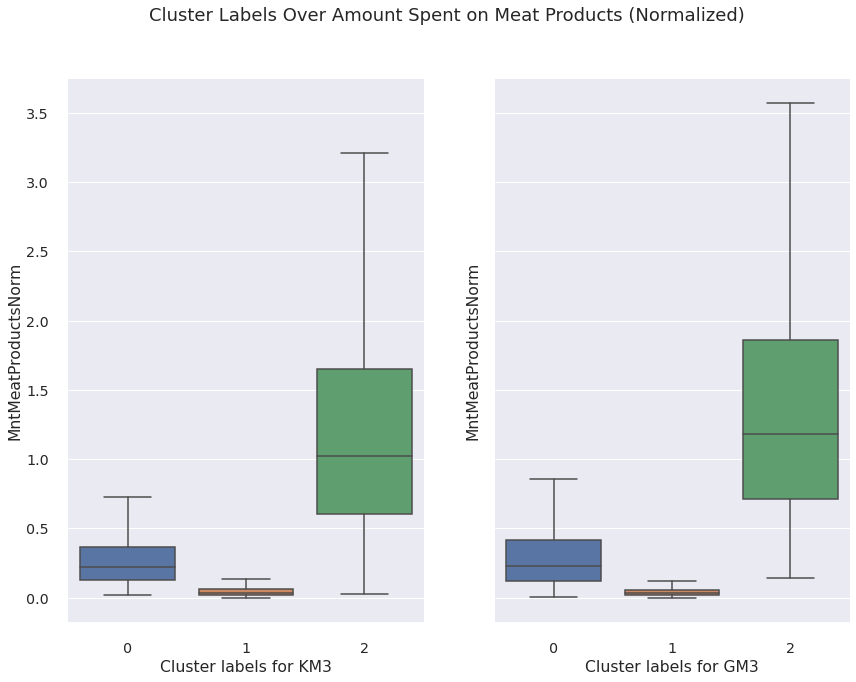

<Figure size 432x288 with 0 Axes>

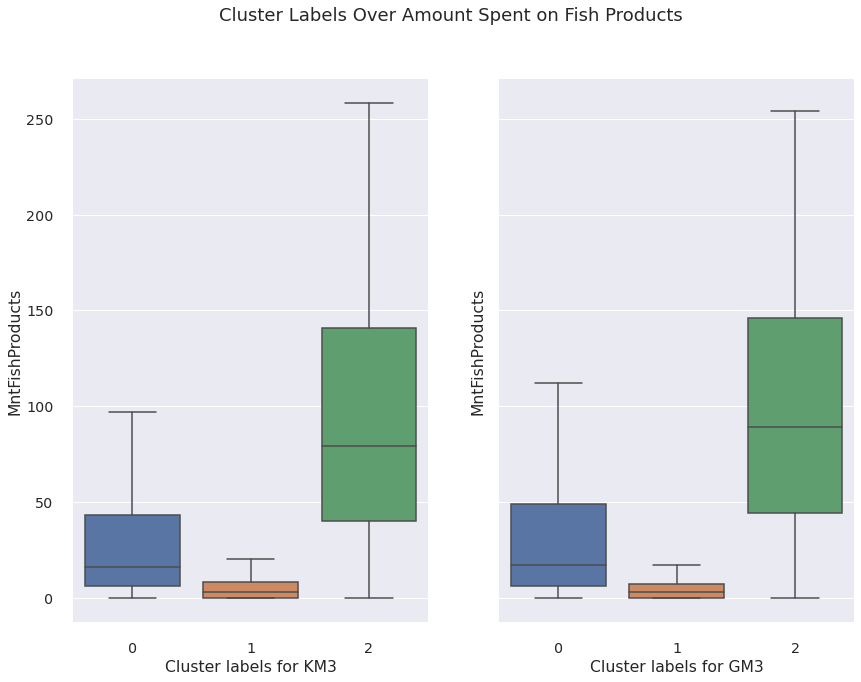

<Figure size 432x288 with 0 Axes>

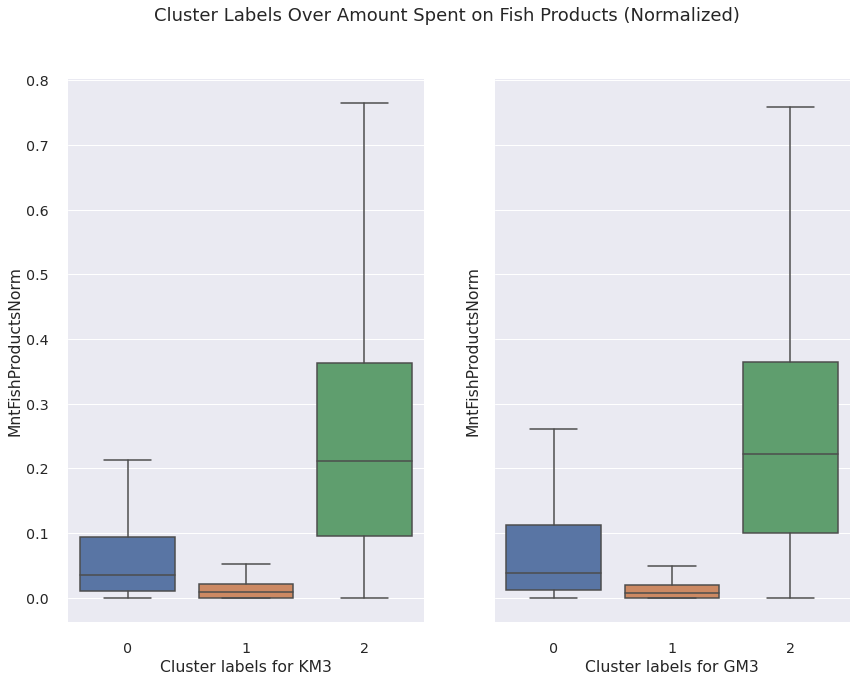

<Figure size 432x288 with 0 Axes>

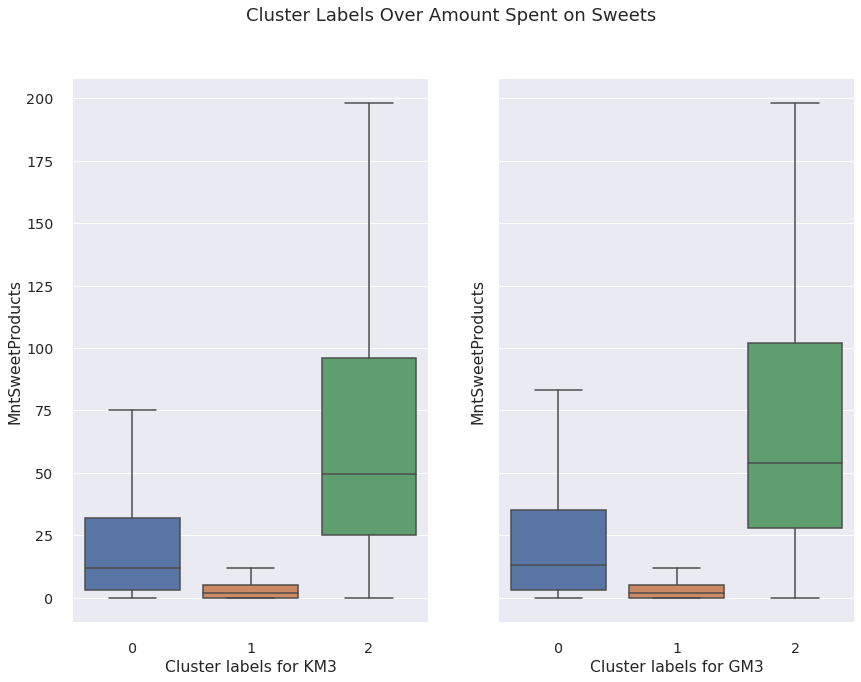

<Figure size 432x288 with 0 Axes>

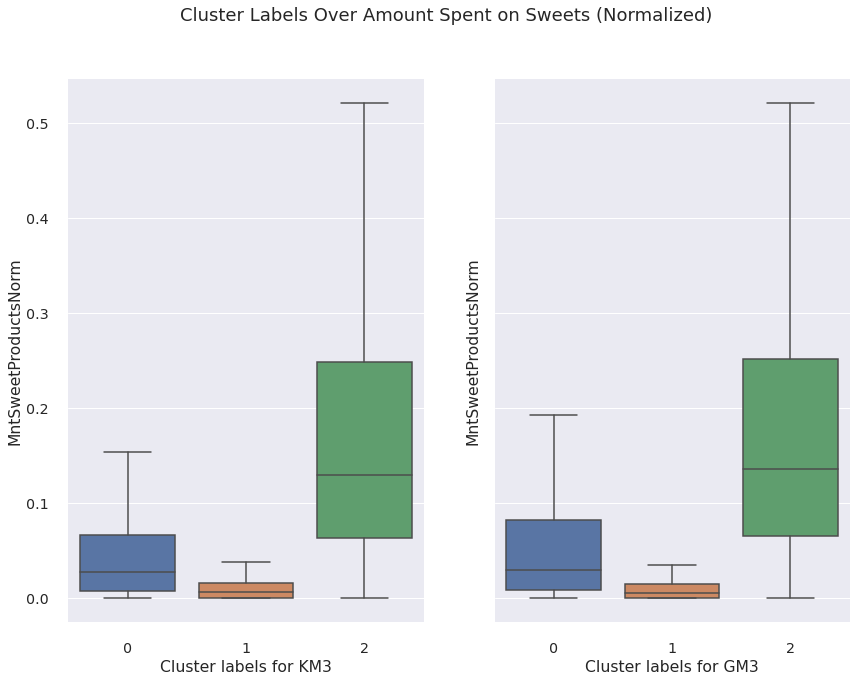

<Figure size 432x288 with 0 Axes>

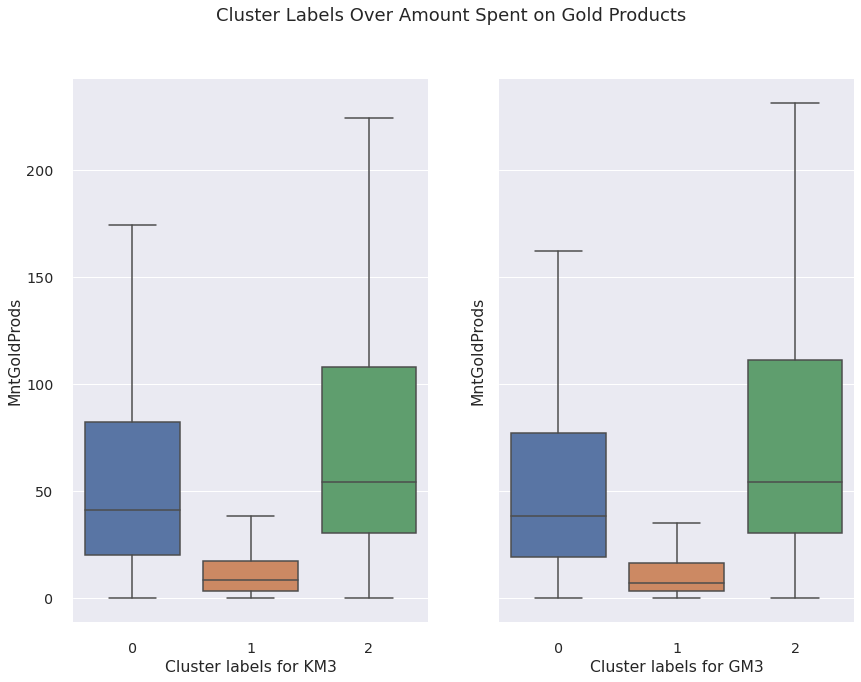

<Figure size 432x288 with 0 Axes>

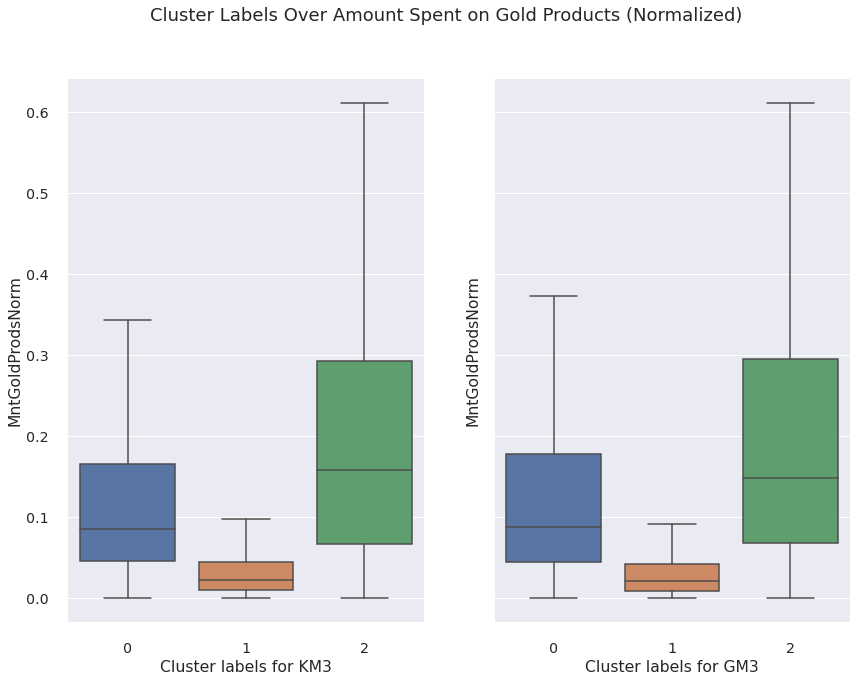

CLUSTERS OVER RECENCY


<Figure size 432x288 with 0 Axes>

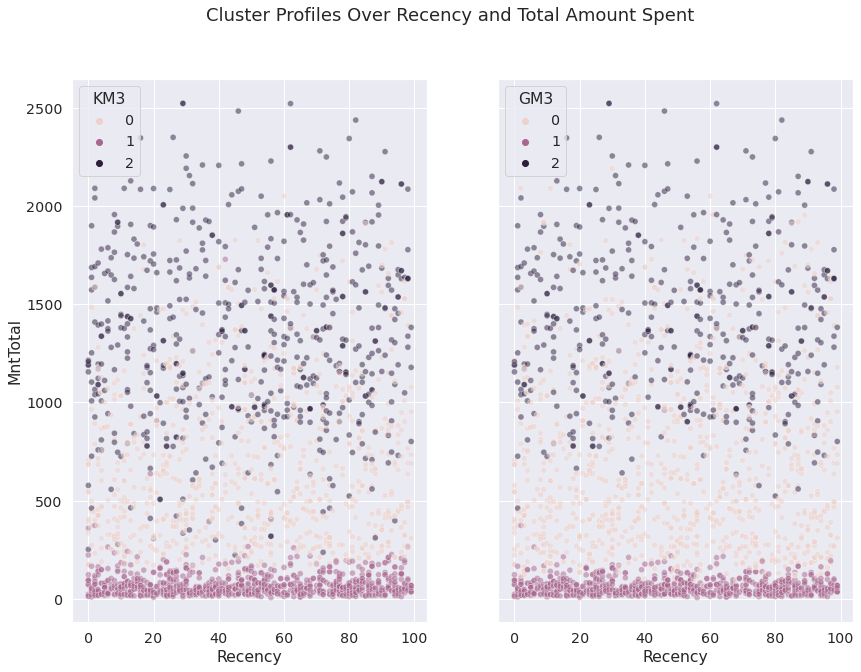

<Figure size 648x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

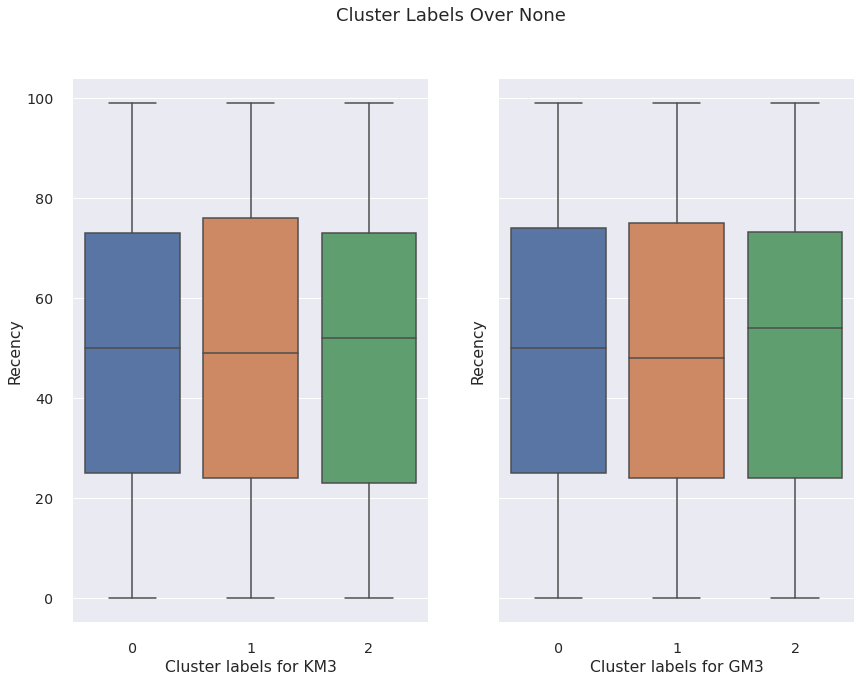

<Figure size 432x288 with 0 Axes>

In [5]:
run_plots(data=df)

## KMeans description
- From a high level, our KMeans algorithm follows the below steps in order to find optimal cluster groups:

1. Select k as the number of groups to cluster for
2. Randomly pick k points in our data as centroid points
3. Assign each non-centroid point to its closest centroid
4. Recalculate centroid points by taking the average of all surrounding points assigned to that cluster
5. Repeat steps 3-4 until calculated centroid points do not move anymore. Done
- Source: https://philippeheitzmann.com/2022/01/implementing-kmeans-clustering/

- Based on the elbow method, use 6 clusters. I also tried the silhouette method, which gave ambiguous results.

In [5]:
def plot_counts(data,label):
    # Code hint from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
    plt.figure(figsize=(9, 7))

    ax = sns.countplot(x=data[label], data=data,hue=None,color='#4503fc',order=data[label].value_counts(ascending=False).index);
            
    abs_values = data[label].value_counts(ascending=False)
    rel_values = data[label].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Cluster Sizes")



#### Will need this function in the groupby analyses that follow

In [6]:
def total_spent_by_cluster(data,cluster_lab, norm=False):
    norm_lab='Norm' if norm else ""

    n_clusters = data[cluster_lab].nunique()

    cluster_mnt_totals = [[]]*n_clusters

    for i in range(n_clusters):
        cluster_i=data[data[cluster_lab]==i]
        cluster_mnt_totals[i] = cluster_i.MntSpentNorm.mean()*len(cluster_i) if  norm else cluster_i.MntTotal.mean()*len(cluster_i)

    print(cluster_mnt_totals) 

    columns = ['cluster'+str(i) for i in range(n_clusters)]
    print(columns)

    df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

    df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:f'TotalAmountSpent{norm_lab}'},axis=1)

    df_cluster_mnt_totals.sort_values(f'TotalAmountSpent{norm_lab}', ascending=False).plot.bar(color='#4503fc')
    #plt.savefig('./figures/total_spent.png')


In [7]:
df.describe()

,ID,KM3,GM3,MntTotal,MntSpentNorm,Income,Len_Customer,HasChildren,HasPartner,NumChildren,age,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTot,Response,Complain,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumTotalPurchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response.1,Complain.1,KM2,AC3,AC2,GM2,LogIncome,MntWinesNorm,MntFruitsNorm,MntMeatProductsNorm,MntFishProductsNorm,MntSweetProductsNorm,MntGoldProdsNorm,NumDealsPurchasesNorm,NumWebPurchasesNorm,NumStorePurchasesNorm,NumWebVisitsMonthNorm,NumCatalogPurchasesNorm,SpendPropOfTotal,AvgPerPurchase,NumTotalPurchasesNorm
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.00000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,5589.296097,0.916106,0.771198,605.541050,1.652585,51619.504262,450.777479,0.716016,0.644235,0.951996,45.111261,0.064603,0.013459,0.073127,0.074921,0.072678,0.298789,0.149843,0.008973,1968.888739,0.444594,0.507402,49.106326,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055,20.20323,2.319874,4.100045,2.636608,5.812472,5.334231,0.149843,0.008973,0.470166,0.656797,0.533423,0.459399,10.749553,0.818573,0.074516,0.460445,0.106404,0.075355,0.117292,0.006314,0.011353,0.016613,0.014840,0.007382,0.020761,26.840943,0.056501
std,3244.840538,0.769513,0.763070,601.032228,2.171865,20601.216248,202.248700,0.451030,0.478852,0.751976,11.707430,0.245879,0.115255,0.260403,0.263324,0.259666,0.679597,0.356998,0.094319,11.707430,0.538636,0.544735,28.946476,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255,7.23009,1.895252,2.775461,2.796161,3.242144,2.414981,0.356998,0.094319,0.499221,0.778541,0.498994,0.498461,0.496424,1.119062,0.146868,0.771058,0.205539,0.145509,0.188556,0.006981,0.011189,0.014303,0.012084,0.010395,0.028764,43.424736,0.038231
min,0.000000,0.000000,0.000000,5.000000,0.009276,1730.000000,97.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.456455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000393,0.228571,0.001277
25%,2829.000000,0.000000,0.000000,69.000000,0.202899,35416.000000,278.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,14.00000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.474947,0.067873,0.003565,0.042857,0.006319,0.003623,0.022487,0.002571,0.004808,0.007194,0.008152,0.000000,0.005331,5.000000,0.032000
50%,5455.000000,1.000000,1.000000,397.000000,0.867257,51381.500000,453.000000,1.000000,1.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,19.00000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.847053,0.418900,0.019920,0.152455,0.028777,0.020000,0.057441,0.004622,0.008671,0.012658

## Groupby and Total Spent Analyses

### KMeans with 3 Clusters

In [8]:
LABEL='KM3'

In [9]:
groupsByCluster=df.groupby([LABEL])#.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])
groupsByCluster.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                                 GM3               \
    count      sum min    max         mean          std count  sum min max   
KM3                                                                          
0     761  4201083  17  11176  5520.477004  3312.530743   761    4   0   2   
1     894  5025113   9  11191  5620.931767  3231.023557   894  815   0   1   
2     574  3232345   0  11101  5631.263066  3179.126213   574  900   0   2   

                        MntTotal                                              \
         mean       std    count     sum  min   max         mean         std   
KM3                                                                            
0    0.005256  0.102463      761  520480  138  2053   683.942181  393.578818   
1    0.911633  0.283987      894   64835    5  1730    72.522371   77.671495   
2    1.567944  0.823785      574  764436  222  2525  1331.770035  458.246147   

    MntSpentNorm                                                       Income  \
           count          sum       min        max      mean       std  count   
KM3                                                                             
0            761  1146.287662  0.200528   8.071429  1.506291  1.077276    761   
1            894   195.697553  0.009276   2.720126  0.218901  0.215126    894   
2            574  2341.626654  0.477733  19.788991  4.079489  2.755766    574   

                                                               Len_Customer  \
            sum      min       max          mean           std        count   
KM3                                                                           
0    42360494.0   7144.0   94871.0  55664.249671  11800.593563          761   
1    29298520.0   1730.0   64587.0  32772.393736  11723.283202          894   
2    43400861.0  38620.0  113734.0  75611.256098   9940.068280          574   

                                                   HasChildren               \
          sum   min    max        mean         std       count  sum min max   
KM3                                                                           
0    395758.0  97.0  796.0  520.049934  188.745443         761  710   0   1   
1    367652.0  97.0  794.0  411.243848  197.881413         894  788   0   1   
2    241373.0  98.0  795.0  420.510453  202.593617         574   98   0   1   

                        HasPartner                                   \
         mean       std      count  sum min max      mean       std   
KM3                                                                   
0    0.932983  0.250216        761  499   0   1  0.655716  0.475447   
1    0.881432  0.323461        894  577   0   1  0.645414  0.478655   
2    0.170732  0.376603        574  360   0   1  0.627178  0.483977   

    NumChildren                                     age                 \
          count   sum min max      mean       std count    sum min max   
KM3                                                                      
0           761   918   0   3  1.206307  0.592286   761  36606  22  71   
1           894  1105   0   3  1.236018  0.701303   894  37521  18  74   
2           574    99   0   2  0.172474  0.382709   574  26426  19  73   

                          AcceptedCmp1                                   \
          mean        std        count  sum min max      mean       std   
KM3                                                                       
0    48.102497  10.250161          761   26   0   1  0.034166  0.181774   
1    41.969799  10.820027          894    1   0   1  0.001119  0.033445   
2    46.038328  13.527630          574  117   0   1  0.203833  0.403197   

    AcceptedCmp2                                 AcceptedCmp3              \
           count sum min max      mean       std        count sum min max   
KM3                                                                         
0            761   9   0   1  0.011827  0.108176          761  61 

- KM3 results
- Cluster 2 spends most, has highest income, way fewer kids (but most likely to have a partner)
- make fewer purchases than Cluster 0, but double spending per person
- Campaigns 1 and 5 were most successful with them
- 46 yrs old on average, compared to 48 for Cluster 0  and 42 for Cluster 2

- Figure out how much each cluster spends

[520480.0, 64834.99999999999, 764436.0]
['cluster0', 'cluster1', 'cluster2']


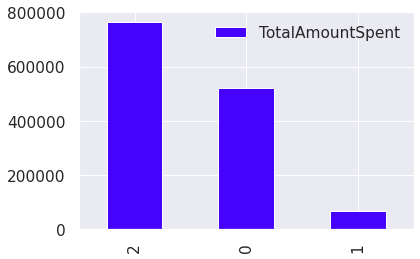

In [10]:
total_spent_by_cluster(data=df,cluster_lab=LABEL)

[1146.2876623353693, 195.6975528534914, 2341.6266540907473]
['cluster0', 'cluster1', 'cluster2']


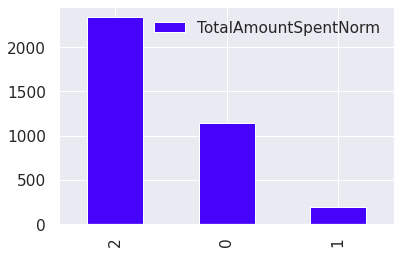

In [11]:
total_spent_by_cluster(data=df,cluster_lab=LABEL,norm=True)

<AxesSubplot:title={'center':'Number of Customers by Cluster'}>

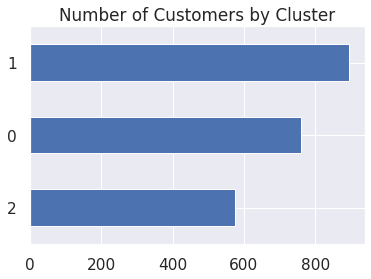

In [12]:
df[LABEL].value_counts().sort_values().plot(kind = 'barh',title="Number of Customers by Cluster")

<!-- # Description of Customer Behavior
- Clusters 2 and 4 are big clusters that spend little
- Clusters 2 and 4  are usually educated, relatively recent customers, but are much more likely to have children than Clusters 1 and 3. Perhaps this store focuses on high-end more expensive products (Whole Foods at Monterey?) and people with children are finding it harder to afford shopping there, on average.  Cluster 5 customers have about just as likely to have children as Clusters 2 and 4, yet have a higher income.  
- To confirm these findings, Clusters 2, 4, and 5 are making the most deal purchases, especially when these are normalized by length someone spend as a customer.
 -->

In [13]:

sns.set(font_scale=1.4)
def box_plots(data,cluster_lab1="KM3",cluster_lab2="GM3",y="NumWebPurchases",y_lab=None):
    fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(14,10))

    sns.boxplot(data=data,ax=ax0,x=cluster_lab1, y=y)
    sns.boxplot(data=data,ax=ax1,x=cluster_lab2, y=y)#,order=[2,1,0])

    sns.despine(offset=10, trim=True)
    ax0.set(xlabel=f'Cluster labels for {cluster_lab1}')
    ax1.set(xlabel=f'Cluster labels for {cluster_lab2}')

    #plt.title(f'Cluster labels for {y}')
    plt.suptitle(f'Cluster labels for {y_lab}')

    plt.show()
    plt.clf() #clear figure

In [14]:
def bar_charts(data,cluster_lab1="KM3",cluster_lab2="GM3",y="Education"):
    fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(14,12))

    plt.figure(figsize=(9, 7))
    palette=sns.color_palette("Set2")
    sns.countplot(data=data,ax=ax0,x=cluster_lab1,hue=y, palette = palette)
    sns.countplot(data=data,ax=ax1,x=cluster_lab2,hue=y, palette = palette)

    fig.suptitle(f"Cluster Profiles Based On {y}")
    #plt.legend()
    plt.show()
    plt.clf()


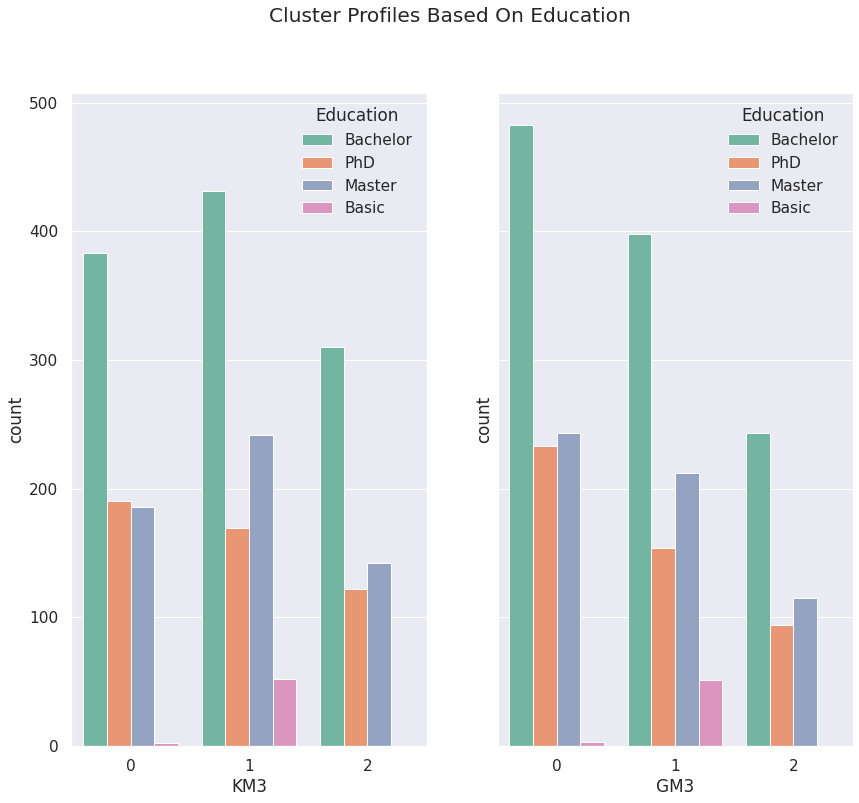

<Figure size 648x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
bar_charts(data,cluster_lab1="KM3",cluster_lab2="GM3",y="Education")


In [37]:
def cluster_scatter(data,cluster_lab1="KM3",cluster_lab2="GM3",x='Income',y="MntTotal",x_lab=None, y_lab=None):
    fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(14,10))

    #print(f'Scatter plots for {y_lab} vs {x_lab}')
    plt.figure(figsize=(9, 7))
    #palette=sns.color_palette("rocket", as_cmap=True)
    #palette = sns.color_palette("cmo.balance", n_colors=64, desat=0.2)
    sns.scatterplot(data = data,ax=ax0,x=x, y=y,hue=cluster_lab1,alpha=.5)#,palette=palette)
    sns.scatterplot(data = data,ax=ax1,x=x, y=y,hue=cluster_lab2,alpha=.5,hue_order=['2','1','0'])#,palette=palette)
    
    #fig.text(y=y_lab,va='center', rotation='vertical')
    #fig.text(0.04, 0.5, y_lab, va='center', rotation='vertical')
    fig.suptitle(f"Cluster Profiles Over {x_lab} and {y_lab}",)
    #plt.legend()
    plt.show()
    plt.clf() #clear figure


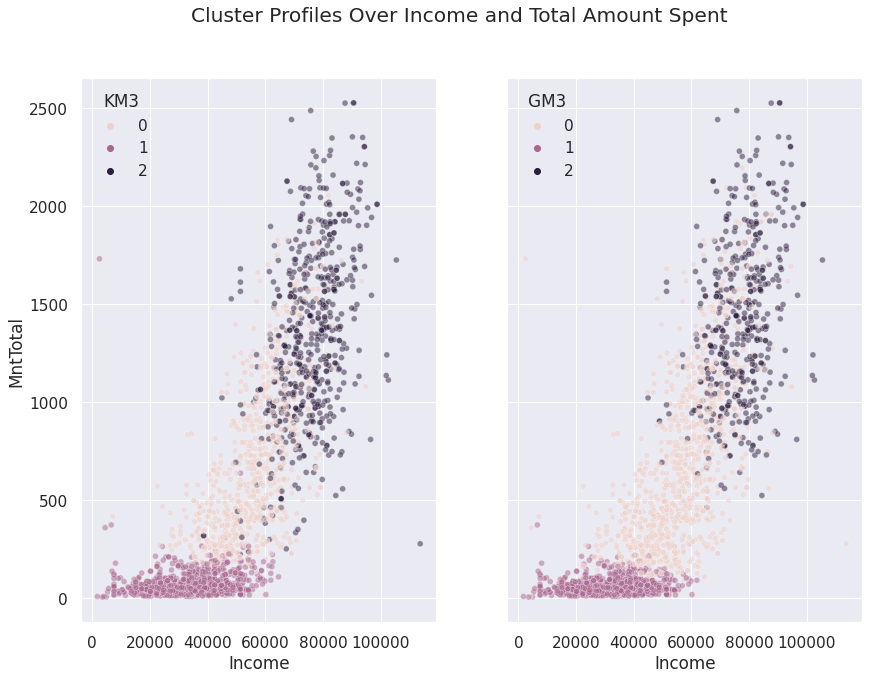

<Figure size 648x504 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [38]:
cluster_scatter(data,cluster_lab1="KM3",cluster_lab2="GM3",x='Income',y="MntTotal",x_lab='Income', y_lab='Total Amount Spent')

In [18]:
def box_plots(data,cluster_lab1="KM3",cluster_lab2="GM3",y="NumWebPurchases"):
    fig, (ax0,ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(12,10))

    sns.boxplot(data=data,ax=ax0,x=cluster_lab1, y=y)
    sns.boxplot(data=data,ax=ax1,x=cluster_lab2, y=y,order=[2,1,0])

    sns.despine(offset=10, trim=True)
    ax0.set(xlabel=f'Cluster labels for {cluster_lab1}')
    ax1.set(xlabel=f'Cluster labels for {cluster_lab2}')

    #plt.title(f'Cluster labels for {y}',)
    plt.suptitle(f'Cluster labels for {y}',)

    plt.show()
    plt.clf() #clear figure



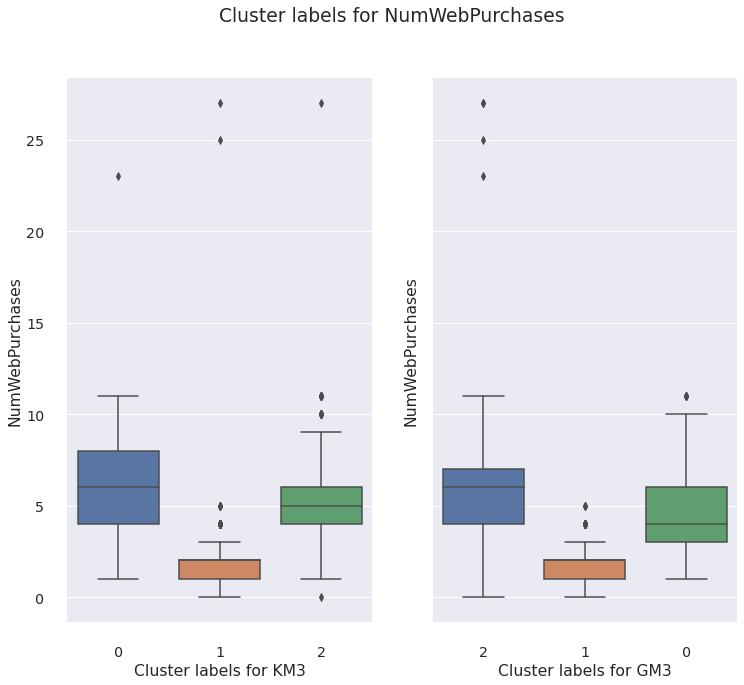

<Figure size 432x288 with 0 Axes>

In [19]:
box_plots(data=df,cluster_lab1="KM3",cluster_lab2="GM3",y="NumWebPurchases")

In [5]:
run_plots(data=df,cluster_lab=LABEL)

NameError: name 'LABEL' is not defined

## Additional analyses

#### KMeans2 results

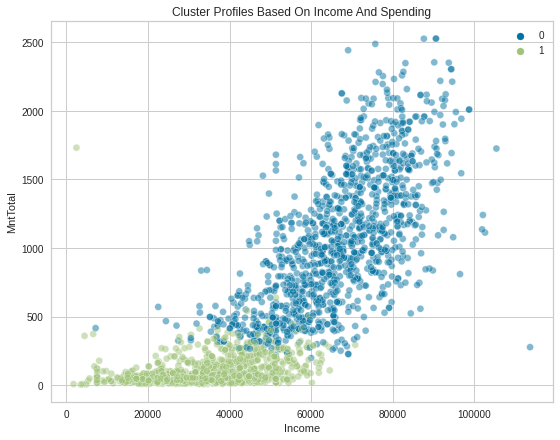

In [ ]:
cluster_scatter(data=df,x_lab='Income',y_lab='MntTotal',cluster_lab='KM2')

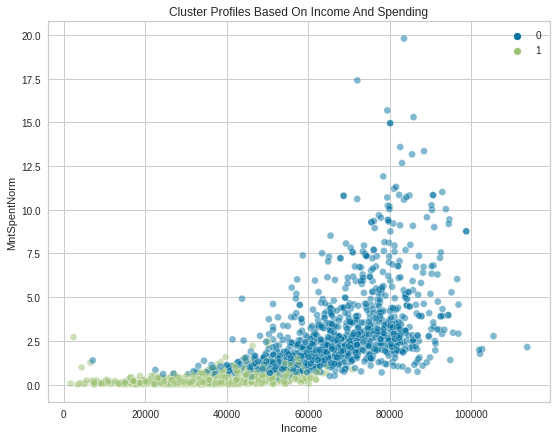

In [ ]:
cluster_scatter(data=df,x_lab='Income',y_lab='MntSpentNorm',cluster_lab='KM2')

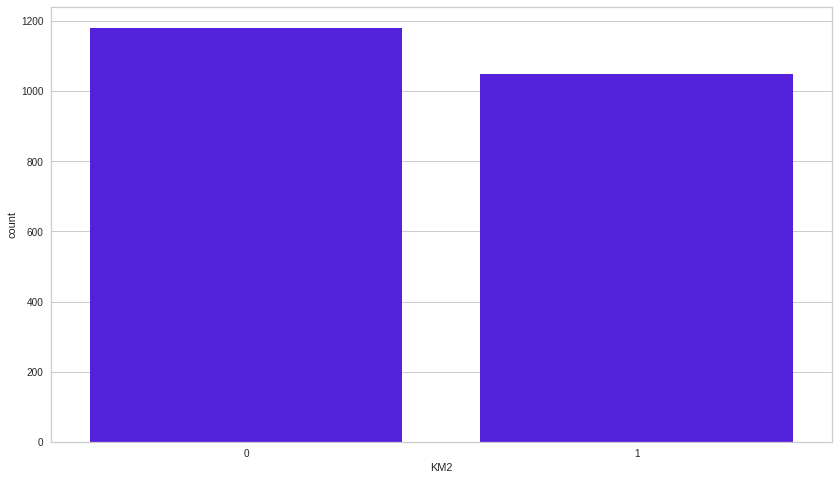

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='KM2', data=df,hue=None,color='#4503fc',)
plt.show()

In [ ]:
df.KM2.value_counts()

0    1181
1    1048
Name: KM2, dtype: int64

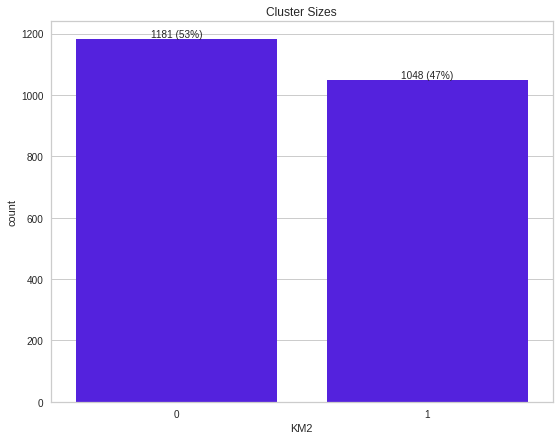

In [51]:
plot_counts(df,'KM2')

### Agglomerative Clustering with 3 Clusters

In [ ]:
LABEL='AC3'

In [ ]:
groupsByCluster=df.groupby([LABEL])#.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])
groupsByCluster.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                                 KM3                \
    count      sum min    max         mean          std count   sum min max   
AC3                                                                           
0    1189  6662851   9  11188  5603.743482  3261.684892  1189   881   0   2   
1     616  3434199   0  11191  5574.998377  3232.507751   616  1063   0   2   
2     424  2361491   1  11176  5569.554245  3222.705820   424    98   0   2   

                          GM3                                   MntTotal  \
         mean       std count   sum min max      mean       std    count   
AC3                                                                        
0    0.740959  0.440209  1189  1569   1   2  1.319596  0.466516     1189   
1    1.725649  0.670681   616   334   0   2  0.542208  0.884282      616   
2    0.231132  0.640163   424   836   0   2  1.971698  0.236505      424   

                                                MntSpentNorm               \
        sum  min   max         mean         std        count          sum   
AC3                                                                         
0    187693    5  1730   157.857864  195.602124         1189   470.594372   
1    791741   71  2525  1285.293831  486.368036          616  2280.338370   
2    370317  174  2092   873.389151  378.370754          424   932.679127   

                                             Income                       \
          min        max      mean       std  count         sum      min   
AC3                                                                        
0    0.009276   3.378571  0.395790  0.449898   1189  44025197.5   1730.0   
1    0.182990  19.788991  3.701848  2.793991    616  45108702.5   4428.0   
2    0.414921   8.149254  2.199715  1.439241    424  25925975.0  27421.0   

                                          Len_Customer                         \
          max          mean           std        count       sum   min    max   
AC3                                                                             
0     76068.0  37027.079479  13474.951019         1189  517570.0  97.0  796.0   
1    113734.0  73228.413149  12792.847565          616  279551.0  98.0  795.0   
2     93404.0  61146.167453  10863.753066          424  207662.0  97.0  793.0   

                            HasChildren                                    \
           mean         std       count   sum min max      mean       std   
AC3                                                                         
0    435.298570  197.088409        1189  1082   0   1  0.910008  0.286290   
1    453.816558  203.666379         616   121   0   1  0.196429  0.397619   
2    489.768868  209.375066         424   393   0   1  0.926887  0.260630   

    HasPartner                                  NumChildren                \
         count  sum min max      mean       std       count   sum min max   
AC3                                                                         
0         1189  774   0   1  0.650967  0.476865        1189  1501   0   3   
1          616  376   0   1  0.610390  0.488058         616   124   0   2   
2          424  286   0   1  0.674528  0.469104         424   497   0   3   

                          age                                       \
         mean       std count    sum min max       mean        std   
AC3                                                                  
0    1.262405  0.668010  1189  51764  18  74  43.535744  10.907621   
1    0.201299  0.413274   616  27723  19  73  45.004870  13.506216   
2    1.172170  0.580274   424  21066  24  70  49.683962   9.727207   

    AcceptedCmp1                                  AcceptedCmp2              \
           count  sum min max      mean       std        count sum min max   
AC3                                                                          
0           1189    6   0   1  0.005046  0.070887         1189   6   0   1   
1        

- The initial cluster visualizations in the previous notebook showed that clusters were less separated.  The results of groupby also seem less clear cut. Decide to pursue KMeans and Gaussian Mixture Models only.

[187693.0, 791741.0000000001, 370317.0]
['cluster0', 'cluster1', 'cluster2']


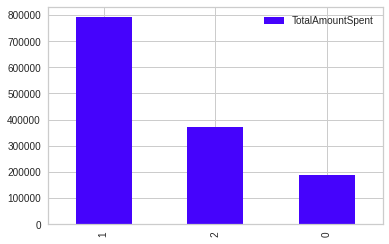

In [ ]:
total_spent_by_cluster(data=df,cluster_lab=LABEL)

[470.59437185543754, 2280.338370004106, 932.6791274200651]
['cluster0', 'cluster1', 'cluster2']


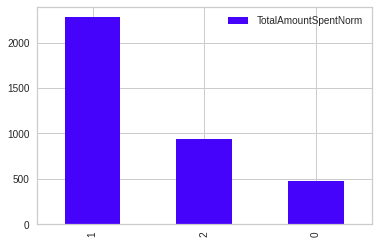

In [ ]:
total_spent_by_cluster(data=df,cluster_lab=LABEL,norm=True)

<!-- # Description of Customer Behavior
- Clusters 2 and 4 are big clusters that spend little
- Clusters 2 and 4  are usually educated, relatively recent customers, but are much more likely to have children than Clusters 1 and 3. Perhaps this store focuses on high-end more expensive products (Whole Foods at Monterey?) and people with children are finding it harder to afford shopping there, on average.  Cluster 5 customers have about just as likely to have children as Clusters 2 and 4, yet have a higher income.  
- To confirm these findings, Clusters 2, 4, and 5 are making the most deal purchases, especially when these are normalized by length someone spend as a customer.
 -->